# Google Machine Learning Crash Course with TensorFlow

https://developers.google.com/machine-learning/crash-course

## ML Concepts


### Framing

What is (Supervised) Machine Learning?

ML systems learn hot to combine input to produce useful predictions on never-before-seen data.


*Terminology*
- Label - the variable we're predicting, typically represented by the variable y.
- Features - input variables describing our data, typically represented by the variables (x1, x2, x3, ..., xn)
- Example - a particular instance of data, x
    - Labeled example has features and label
    - Unlabeled example has only features
    
- Model maps examples to predicted labels: y', defined by internal parameters, which are learned. 
    - Regression model predicts continuous values.
    - Classification model predicts discrete values.
    
    
### Descending into ML

Linear Regression 

![Linear Regression](_img/mlcc1.png)

y = wx + b

w = weight vector 
b = bias

Training a model simply means learning (determining) good values for all the weights and the bias from labeled examples. Supervised ML algorithm builds a model by minimizing loss, this process is called empirical risk minimization.

Loss function
- L2 Loss (Squared Error) = square of the difference between prediction and label

- MSE (Mean Squared Error) is the average squared loss per example. Sum of all squared losses for individual examples divided by number of examples.


### Reducing Loss

Iterative Approach
![Iterative approach](_img/mlcc2.png)


- Start with initial values for b and w
- Compute y'
- Compute loss 
- Compute parameter update*
- Compute y' 
- Continue the loop until overall loss is unchanged or changes extremely slowly



Computing parameter update

Regression problems have a convex loss vs weight plots
![convex](_img/mlcc3.png)

Convex problems have only one minimum, i.e. only one place where the slope is exactly 0. This minimum can be found by gradient descent.

Gradient descent algorithm
- Pick a starting point 0 or a random number
- Calculate the gradient (derivative) of the loss curve at the starting point
- Gradient is a vector, it points in the direction of the steepest increase in the loss function
- Gradient descent takes a step in the opposite direction of the gradient*
- Repeat until minimum is found


Learning Rate
- Gradient descent algorithms multiply the gradient by a scalar known as learning rate (or step size) to determine the next point.
- Very small learning rate results in long time to find minimum.
- Very large learning rate results in perpetual bouncing with no covergance.
- Ideal learning rate in one-direction is 1/f(x)''  (the inverse of the second derivative of f(x) at x)
- Ideal learning rate for 2 or more dimensions is the inverse of the Hessian (matrix of second partial derivatives)


Stochastic Gradient Descent 
- Gradient descent algorithm uses all the examples to calculate the gradient in a single iteration.
- If the dataset is too large, a single iteration may take a very long time to compute.
- Stochastic Grandient Descent SGD uses only a single example (chosen at random) per iteration
- Given enough iterations SGD works, but it's very noisy.
- A trade off is mini batch stochastic gradient descent, where gradients are computed on a batch of 10-1000 randomly chosen samples



### TensorFlow

Computational framework for building machine learning models. TensorFlow provides a variety of different toolkits that allow construction of models at your preferred level of abstraction.

![TensorFlow architecture](_img/mlcc4.png)

TensorFlow components
- graph protocol buffer
- runtime that executes the distributed graph


Pseudocode for linear classification program implemented in tf.estimator 
```
import tensorflow as tf

# Set up a linear classifier.
classifier = tf.estimator.LinearClassifier(feature_columns)

# Train the model on some example data.
classifier.train(input_fn=train_input_fn, steps=2000)

# Use it to predict.
predictions = classifier.predict(input_fn=predict_input_fn)
```



### Evaluating a model

Mean Squared Error (MSE) can be hard to interpret, so we often look at Root Mean Squared Error (RMSE) instead. A nice property of RMSE is that it can be interpreted on the same scale as the original targets.



Standard Heuristic for Model Tuning
The effects of different hyperparameters are data dependent. So there are no hard-and-fast rules; you'll need to test on your data.Following are rules of thumb for model training:

- Training error should steadily decrease, steeply at first, and should eventually plateau as training converges.
- If the training has not converged, try running it for longer.
- If the training error decreases too slowly, increasing the learning rate may help it decrease faster.
- But sometimes the exact opposite may happen if the learning rate is too high.
- If the training error varies wildly, try decreasing the learning rate.
- Lower learning rate plus larger number of steps or larger batch size is often a good combination.
- Very small batch sizes can also cause instability. First try larger values like 100 or 1000, and decrease until you see degradation.
- Again, never go strictly by these rules of thumb, because the effects are data dependent. Always experiment and verify.


### Generalization

The goal of machine learning is to predict well on new data draw from (hidden) true distribution. 
The problem is we don't see the truth, we only get a sample from it.

Overfitting occurs when a model tries to fit the training data so closely that it does not generalize well to new data.

The fundamental tension of machine learning is between fitting our data well, but also fitting the data as simply as possible.

![Generalization](_img/mlcc5.png)


Theoretical Generalization
Based on ideas of measuring model simplicity/complexity


Generalization Intuition
Occam's Razor, 'Other things being equal, simpler explanations are generally better than more complex ones'


Empiral Generalization
Evaluate the model on new test set


Basic assumptions for Generalization
- The examples are drawn independently and identically (i.i.d.) at random from the distribution.
- The distribution is stationary, i.e. does not change over time.
- The examples are drawn from the same distribution.

If these assumptions of supervised ML are not met, then we lose important theoretical guarantees on our ability to predict on new data.


### Training and Test sets

Test data set should
- be large enough to yield statistically meaningful results.
- be representative of the data set as a whole. In other words, don't pick a test set with different characteristics than the training set.



### Validation

Tweaking the model to get the best performance on test data can result in overfitting the test data set. To avoid this we use the following workflow - 

![Validation](_img/mlcc6.png)




### Representation

Mapping Raw Data to Features
![Representation](_img/mlcc7.png)


- Integer and floating-point data don't need special encoding
- Categorical data can be encoded using binary vector, the length of the vector is equal to the number of distinct elements in the categorical data


Sparse Representation
- Suppose a dataset has a categorical variable with 1,000,000 distinct values
- Having a binary vector of 1,000,000 elements is very inefficient representation
- In this situation a common approach is to use a sparse representation in which only non-zero values are stored
- In sparse representation, an independent model weight is still learned for each feature value


Properties of good Feature
- Avoid rarely used discrete features
- Prefer clean and obvious meaning, e.g. house age in years, not in seconds
- Don't use magic values with actual data, e.g. use -1 for missing value for floating point feature with range 0 to 1
- Account for upstream instability, the feature definition shouldn't change over time


Cleaning Data
1. Scaling 
    - Converting natural range to a standard range (0 to 1, -1 to 1, etc.)
    - Not useful if the model has only a single feature
    - Helps gradient descent converge more quickly
    - Helps avoid NaN trap, in which one number in the model becomes NaN due to math operations
    - Helps the model learn appropriate weights for each feautre, without feature scaling, the model will pay too much attention to the features with wider range
    
2. Handling extreme outliers
    - One way to handle outliers is to cap or clip the maximum value, e.g.
    - ![Large Tail](_img/mlcc8.png)
    - ![Normal Distribution with one artifact](_img/mlcc9.png)
    
    
3. Binning values
    - Often we have continuous features in our data which don't have a linear relation with the target
    - For example, in california housing price prediction, there exists no linear relationship between lattitude and housing price.
    - In such scenarios we can create bins as suggested in the following figure
    - ![Binning](_img/mlcc10.png)
    - Another approach is to bin by quantile, which ensures that the number of examples in each bucket are equal


4. Scrubbing
    - Real-life data sets are often have omitted values, duplicate examples, bad labels, bad feature values
    - In addition to detecting bad individual examples, we must also detect bad data in aggregate using histograms, min and max, mean and median, standard deviation
    
    

In summary,
- Keep in mind what you think your data should look like.
- Verify that the data meets these expectations (or that you can explain why it doesn’t).
- Double-check that the training data agrees with other sources (for example, dashboards).

__Good ML relies on good data__


### Feature Crosses

Consider the following diagram where
- Blue dots represent sick trees
- Orange dots represent healthy trees

![Non linear problem](_img/mlcc11.png)

We can't draw a straight line that neatly separates the two classes.
This is a non-linear problem

To solve this problem we create a feature cross.
A feature cross is a synthetic feature that encodes nonlinearity in the feature space by multiplying two or more input features together.

A feature cross can be created by
- multiplying the values of two features, e.g. A X B
- multiplying the values of more than two features, e.g. A X B X C X D
- multiplying the value the same feature multiple times, e.g. A X A, A X A X A


Creating a feature cross of two one-hot feature vectors results in extremely sparse one-hot feature vector.


For example,
Suppose we have two one-hot feature vectors, binned lattitude and binned longitude

```
binned_latitude(lat) = [0  < lat <= 10
                        10 < lat <= 20  
                        20 < lat <= 30]

binned_longitude(lon) = [0  < lon <= 15
                         15 < lon <= 30]
```

The feature cross of these two one-hot feature vectors would be,

```
binned_latitude_X_longitude(lat, lon) = 
                        [0  < lat <= 10 AND 0  < lon <= 15
                         0  < lat <= 10 AND 15 < lon <= 30
                         10 < lat <= 20 AND 0  < lon <= 15
                         10 < lat <= 20 AND 15 < lon <= 30
                         20 < lat <= 30 AND 0  < lon <= 15
                         20 < lat <= 30 AND 15 < lon <= 30]
```

### Regularization for Simplicity

Generalization curve
![Generalization curve](_img/mlcc12.png)

The training loss gradually decreases but the validation loss initially decreases, but after a certain number of iterations increases. This is an example of model overfittiing to the training data set.Overfitting could be avoided by penalizing complex models. The principle of penalizing complex models is called regularization.

Instead of minimizing only loss (empirical risk minimization), we minimize loss + complexity (structural risk minimization)

![minimize loss & complexity](_img/mlcc13.png)

This course focuses on two common and related ways to think about the model complexity
    1. Model complexity as a function of the weights of all the features in the model
    2. Model complexity as a function of the total number of features with nonzero weights
    
Model complexity as a function of the weights of all the features can be quantified as 
    1. Lasso Regularization (L1) - sum of all the weights
    2. Ridge Regularization (L2) - sum of square of all the weights


Lasso = Least Absolute Shrinkage and Selection Operator


Lasso vs Ridge
- Lasso can set some coefficients to zero, thus performing variable selection, while ridge regression cannot.
- Both methods allow to use correlated predictors, but they solve multicollinearity issue differently:
    - In ridge regression, the coefficients of correlated predictors are similar
    - In lasso, one of the correlated predictors has a larger coefficient, while the rest are (nearly) zeroed.

Elastic Net is combining with L1 and L2 regularization with a mixing parameter alpha

![Elastic Net Equation](_img/mlcc14.png)


Examples

1. Imagine a linear model with 100 input features:
    - 10 are highly informative.
    - 90 are non-informative.

    Assume that all features have values between -1 and 1.

    - L2 regularization will encourage many of the non-informative weights to be nearly (but not exactly) 0.0.
    - L2 regularization will encourage most of the non-informative weights to be exactly 0.0.
    L2 regularization may cause the model to learn a moderate weight for some non-informative features.
    Surprisingly, this can happen when a non-informative feature happens to be correlated with the label. In this case, the model incorrectly gives such non-informative features some of the "credit" that should have gone to informative features.



2. Imagine a linear model with two strongly correlated features; that is, these two features are nearly identical copies of one another but one feature contains a small amount of random noise. If we train this model with L2 regularization, Both features will have roughly equal, moderate weights.
    - L2 regularization will force the features towards roughly equivalent weights that are approximately half of what they would have been had only one of the two features been in the model.


Dropout Regularization

- A form of regularization useful in training neural networks. 
- Dropout regularization works by removing a random selection of a fixed number of the units (neurons) in a network layer for a single gradient step.
- The more units dropped out, the stronger the regularization. This is analogous to training the network to emulate an exponentially large ensemble of smaller networks.
- http://jmlr.org/papers/volume15/srivastava14a.old/srivastava14a.pdf


### Logistic Regression

- Many problems require a probability estimate as output. 
- Logistic regression is an extremely efficient mechanism for calculating probabilities.
- Logistic regression is used in classification problems as well, in which the goal is to correctly predict one of two possible labels.
- Logistic regression models ensure that the output falls between 0 and 1, using Signmoid function.

![Signmoid Function Equation](_img/mlcc15.png)

![Signmoid Function Graph](_img/mlcc16.png)


__Loss Function for Logistic Regression__

- Loss function for linear regression is squared loss, while loss function for logistic regression is Log Loss.

![Loss function](_img/mlcc17.png)


__Regularization for Logistic Regression__

- Regularization is extremely important in logistic regression, as the asymptotic nature of logistic regression would keep driving loss towards 0 in high dimensions.
- Most logistic regression models use one of the following two strategies to dampen model complexity
    - L2 Regularization
    - Early stopping, i.e. limiting the number of training steps or the learning rate.


### Classification

__Threshold__

- Logistic regression returns a probability, which can be used as is or converted to a binary value (for example, spam or not spam, malignant or benign, etc.)
- In order to map a logistic regression value to a binary category, we must define a classification thershold (also called decisio threshold). A value above the threshold indicates positive, a value below indicates negative.
- Classification thresholds are problem dependent and not always 0.5.
- Tuning the classification threshold is different that tuning hyperparameters such as learning rate. 

__Confusion Matrix__
- An NxN table that summarizes how successful a classification model's predictions were.
- One axis of a confusion matrix is the label that the model predicted and the other axis is the actual label.
- In binary classification problem, N = 2.

Examples -

![Confusion Matrix](_img/mlcc18.png)


![Confusion Matrix 2](_img/mlcc19.png)

- __True positive__ : An outcome where model correctly predicts the positive class.
- __True negative__ : An outcome where model correctly predicts the negative calss.
- __False positive__ : An outcome where model incorrectly predicts the positive class.
- __False negative__ : An outcome where model incorrectly predicts the negative class.


__Accuracy__
- Accuracy is one metric for evaluating classification models.
- Informally, accuracy is the fraction of preddictions our model got right.
- Formally ,

![Accuracy](_img/mlcc20.png)

- Accuracy can be misleading when working with s class-imbalanced data set.
- For example, if the data set contains 99.9% negative class, and 0.1% positive class (e.g. clickthrough prediction problem), a biased model which always predicts negative class will have 99.9% accuracy.

__Precision__
- Attempts to answer: What proportion of positive identifications was actually correct?
- Defined as TP / (TP + FP)
- A model that produces no false positives has a precision of 1.0.

Example -
- Consider a classification model that separates email into two categories: "spam" or "not spam". If you raise the classification threshold, what will happen to precision?

<details><summary>Answer</summary>
<p>In general, raising the classification threshold reduces false positives, thus raising precision.
</p>
</details>


__Recall__
- Attempts to answer: What proportion of actual positives weas identified correctly?
- Defined as TP / (TP + FN)
- A model that produces no false negatives has a recall of 1.0.

Example -
- Consider a classification model that separates email into two categories: "spam" or "not spam". If you raise the classification threshold, what will happen to recall?

<details><summary>Answer</summary>
<p>Raising our classification threshold will cause the number of true positives to decrease or stay the same and will cause the number of false negatives to increase or stay the same. Thus, recall will either stay constant or decrease.
</p>
</details>


__Precision & Recall__
- To evaluate the effectiveness of a model, we must examine both precision and recall.
- Unfortunately, precision and recall are inversly related, i.e. improving precision typically reduces recall and vice versa.
- F1 score relies on both precision and recall. F1 score is harmonic mean of precision and recall.
- ![F1 Score formula](_img/mlcc21.png)


__ROC curve__

- An ROC (receiver operating characteristic) curve is a graph showing the performance of a classification model at all classification thresholds.
- An ROC curve plots True Positive Rate vs False Positive Rate at different classification thresholds.
- True positive rate (what proportion predicted positive from all the positives) = TP / (TP + FN)
- False positive rate (what proportion predicted positive from all the negatives) = FP / (FP + TN) 
- Example,
![ROC Curve](_img/mlcc22.png)

__AUC ROC__

- AUC ROC stands for Area under the ROC curve.
- AUC measures the entire two dimensional area underneath the entire ROC curve from (0,0) to (1,1)
![ROC AUC](_img/mlcc23.png)
- AUC provides an aggregate measure of performance across all possible classification thresholds.
- AUC can be interpreted as the probability that the model ranks a random positive example more highly than a random negative example.
- AUC is scale-invariant, it measures how well the predictions are ranked, rather than their absolute values.
- AUC is classification-threshold-invarient, it measures the quality of the model's predictions irrespective of what classification threshold is chosen.


__Prediction Bias__
- Logistic regression predictions should be unbiased, i.e. average predictions should approximately equal to average observations.
- Prediction bias is a quantity that measures how far apart those two averages are.
- Prediction bias = average of predictions - average of labels in data set.
- Prediction bias is different than bias b in wx + b.
- A good model will usually have near-zero bias.
- A low prediction bias does not prove that the model is good, a really terrible model could have a zero prediction bias.

__Bucketing and Prediction Bias__
- Logistic regression predicts a value between 0 and 1, while all labeled examples are either exactly 0 or 1.
- Therefore, we can't examine prediction bias on only one example, we must examine the prediction bias on bucket of examples.
- We can form buckets by
    - Linearly breaking up the target predictions.
    - Forming quantiles.
- Example of Callibration Scatter plot
![Calibration scatter plot](_img/mlcc24.png)


Possible reasons for predictions performing poorly only on part of the model 
- Training set doesn't adequately represent certain subsets of the data space.
- Some subsets of the data set are noisier than others.
- The model is overly regularized.


### Regularization: Sparsity

- Sparse vectors contain many dimensions, creating a feature cross results in even more dimensions.
- High dimensional feature vectors result in huge models and higher chances of overfitting.
- In high dimensional sparse vector, it would be nice to encourage weights to drop to exactly 0
- L2 regularization encourages weights to be small, but doesn't force them to exactly 0
- L0 regularization involves adding the count of non-zero coefficient value to the loss function
- L0 regularization is a non-convex optimization problem
- L1 regularization invovles adding the sum of absolute values of the weights to the loss function 


### Neural Networks

__Non Linear classification Problem__

![Non-linear problem](_img/mlcc25.png)

- Non-linear means that we can't predict a label with a model of the form b+w1x1+w2x2.
- The decision surface is not a line.
- Feature crosses is one possible approach to modeling nonlinear problems, but it isn't a viable option for complex datasets. 

__Models as Graphs__

![Linear Model as a Graph](_img/mlcc26.png)

We can represnt the linear model as a graph, with the blue nodes as input and the green node as an output.

To model non-linearity, we add multiple hidden layers with an activation function.

![Neural Network](_img/mlcc27.png)

Stacking non-linearities on top of non-linearities lets us model very complicated relationships between input and output.


__Activation Functions__

- Sigmoid 
    - Sigmoid function converts the weighted sum to a value between 0 and 1.
    - ![Sigmoid Function](_img/mlcc28.png)
    - ![Sigmoid Graph](_img/mlcc29.png)
    
    
- ReLu (Rectified Linear Unit)
    - ReLu often works a little better than a smooth function like the sigmoid, while also being significantly easier to compute.
    - F(x) = max(0, x)
    - Superiority of ReLu is based on empirical findings, probably driven by ReLu having a more useful range of responsiveness. Sigmoid's responsiveness falls off relatively quickly on both sides.
    - ![ReLu Graph](_img/mlcc30.png)

__Neural Network Summary__

Standard componenets of what people usually mean when they say 'neural network'
- A set of nodes, analogous to neurons, organized in layers.
- A set of weights representing connections between each neural network layer and the layer beneath it.
- A set of biases, one for each node.
- An activation function that transforms the output of each node in a layer, different layers may have different activation functions.


### Neural Networks Best Practices

__Backpropogation Failure Cases__

1. Vanishing Gradients
    - The gradients for the lower layers (closer to the input) can become very small. In deep networks, computing these gradients can involve taking the product of many small terms. When the gradients vanish toward 0 for the lower layers, these layers train very slowly, or not at all. 
    - The ReLU activation function can help prevent vanishing gradients.



2. Exploding Gradients
    - If the weights in a network are very large, then the gradients for the lower layers involve products of many large terms. In this case you can have exploding gradients: gradients that get too large to converge. 
    - Batch normalization can help prevent exploding gradients, as can lowering the learning rate.



3. Dead ReLU Units
    - Once the weighted sum for a ReLU unit falls below 0, the ReLU unit can get stuck. It outputs 0 activation, contributing nothing to the network's output, and gradients can no longer flow through it during backpropagation. With a source of gradients cut off, the input to the ReLU may not ever change enough to bring the weighted sum back above 0.  
    - Lowering the learning rate can help keep ReLU units from dying.


### Multi-Class Neural Networks 

In multi-class classification we can classify from multiple possibilities.

__One vs All__
- One vs. all provides a way to leverage binary classification. 
- Given a classification problem with N possible solutions, a one-vs.-all solution consists of N separate binary classifiers—one binary classifier for each possible outcome. 
- This approach is fairly reasonable when the total number of classes is small, but becomes increasingly inefficient as the number of classes rises.
-![One vs All Neural Network](_img/mlcc31.png)
- This approach can be used for Multi-Label problems.


__Softmax__
- Logistic regression produces a decimal between 0 and 1.0, indicating the probability of a sample belonging to the positive class.
- Softmax extends this idea into a multi-class world. That is, Softmax assigns decimal probabilities to each class in a multi-class problem.
- These decimal probabilities must add up to 1.0. This additional constraint helps training converge more quickly than it otherwise would.
-![Softmax](_img/mlcc32.png)
- Full Softmax is the Softmax which calculates a probability for every possible class. Full Softmax is fairly cheap when the number of classes is small but becomes prohibitively expensive when the number of classes climbs.
- Candidate sampling means that Softmax calculates a probability for all the positive labels but only for a random sample of negative labels. Candidate sampling can improve efficiency in problems having a large number of classes.
- Softmax can't be used for Multi-Label problems.


### Embeddings

__Collaborative Filtering__
Collaborative filtering is the task of making predictions about the interests of a user based on interests of many other users.

For example, suppose we have 1,000,000 users, and a list of the movies each user has watched (from a catalog of 500,000 movies). Our goal is to recommend movies to users.

Potential approach embed the movies into a low-dimensional space created such that similar movies are nearby.

- ![One Dimension Embedding](_img/mlcc33.png)
- ![Two Dimension Embedding](_img/mlcc34.png)


__Categorical Input Data__
- Categorical data refers to input features that represent one or more discrete items from a finite set of choices. 
- For example, it can be the set of movies a user has watched, the set of words in a document, or the occupation of a person.
- Categorical data is most efficiently represented via sparse tensors, which are tensors with very few non-zero elements. 
- ![Categorical Input Data example](_img/mlcc35.png)


__Disadvantages of Sparse Representation__

- Huge input vectors mean a super-huge number of weights for a neural network. If there are M words in your vocabulary and N nodes in the first layer of the network above the input, you have MxN weights to train for that layer. 
- The more weights in your model, the more data you need to train effectively.
- The more weights, the more computation required to train and use the model. It's easy to exceed the capabilities of your hardware.
- Lack of meaningful relations between vectors, a vector with a 1 at index 1247 for "horse" is not any closer to a vector with a 1 at index 50,430 for "antelope" than it is to a vector with a 1 at index 238 for "television".



__Embeddings: Translating to a Lower-Dimensional Space__
- We can solve the core problems of sparse input data by mapping your high-dimensional data into a lower-dimensional space.
- Example : ![Embedding Example](_img/mlcc36.png)


__Obtaining Embeddings__

- Standarad Dimensionality Reduction : There are many existing mathematical techniques for capturing the important structure of a high-dimensional space in a low dimensional space (For example, PCA). In theory, any of these techniques could be used to create an embedding for a machine learning system.

- Word2vec: Word2vec is an algorithm invented at Google for training word embeddings. Word2vec relies on the distributional hypothesis to map semantically similar words to geometrically close embedding vectors.



__Training an Embedding as Part of a Larger Model__
- ![DNN Architecture with Embeddings](_img/mlcc37.png)
- ![Geometric view of the embedding layer weights](_img/mlcc38.png)

### MISC NOTES

__Number of Epochs__

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.

One epoch means that each sample in the training dataset has had an opportunity to update the internal model parameters. An epoch is comprised of one or more batches. For example, as above, an epoch that has one batch is called the batch gradient descent learning algorithm.

You can think of a for-loop over the number of epochs where each loop proceeds over the training dataset. Within this for-loop is another nested for-loop that iterates over each batch of samples, where one batch has the specified “batch size” number of samples.





__Gradient Clipping__

Gradient clipping is a technique used in deep learning to optimize and solve problems. Deep learning is a subfield of machine learning that uses algorithms inspired by the structure and function of the human brain and neural networks. 

## Coding Exercises

### First Steps with TensorFlow

In [1]:
# Tensor Flow Example 

# Load required libraries
import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
# %tensorflow_version 1.x
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

In [2]:
# Load the dataset
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")

In [3]:
# Shuffle data to remove any pathological ordering which might affect Stochastic Gradient Descent

california_housing_dataframe = california_housing_dataframe.reindex(
    np.random.permutation(california_housing_dataframe.index))

# Scale the median house value to thousands to use learning rates in usual range
california_housing_dataframe["median_house_value"] /= 1000.0
california_housing_dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
535,-117.0,34.9,36.0,2181.0,555.0,1404.0,492.0,2.3,55.5
3458,-117.9,33.7,24.0,4365.0,804.0,2663.0,753.0,4.6,233.3
2280,-117.4,34.1,18.0,2453.0,537.0,1503.0,500.0,2.4,95.3
6891,-118.3,33.8,35.0,2572.0,504.0,1172.0,519.0,4.6,304.1
3416,-117.9,34.1,36.0,1811.0,320.0,1005.0,332.0,5.6,188.3
...,...,...,...,...,...,...,...,...,...
12209,-121.5,38.5,15.0,10211.0,1995.0,5656.0,1752.0,2.6,107.9
11733,-121.3,38.6,9.0,2748.0,521.0,1663.0,565.0,3.5,113.3
1650,-117.2,34.1,29.0,2654.0,667.0,1822.0,593.0,2.2,72.3
5062,-118.1,34.1,23.0,1190.0,347.0,965.0,327.0,2.2,211.8


In [4]:
# Examine the data
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


In [20]:
# Model 1 
# Label/ Targe = Median house value
# Feature = Total Rooms

# Define the input feature: total_rooms.
my_feature = california_housing_dataframe[["total_rooms"]]

# Configure a numeric feature column for total_rooms.
feature_columns = [tf.feature_column.numeric_column("total_rooms")]

# Define the label.
targets = california_housing_dataframe["median_house_value"]


# Use gradient descent as the optimizer for training the model.
my_optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.0000001)
my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)

# Configure the linear regression model with our feature columns and optimizer.
# Set a learning rate of 0.0000001 for Gradient Descent.
linear_regressor = tf.estimator.LinearRegressor(
    feature_columns=feature_columns,
    optimizer=my_optimizer
)

In [6]:
# define an input function,
# which instructs TensorFlow how to preprocess the data, how to batch, shuffle, and repeat it during model training

def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model of one feature.
  
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
  
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                           
 
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified.
    if shuffle:
        ds = ds.shuffle(buffer_size=10000)
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

In [21]:
# Train the model 
_ = linear_regressor.train(
    input_fn = lambda:my_input_fn(my_feature, targets),
    steps=100
)

In [22]:
# Evaluate the model

# Create an input function for predictions.
# Note: Since we're making just one prediction for each example, we don't 
# need to repeat or shuffle the data here.
prediction_input_fn =lambda: my_input_fn(my_feature, targets, num_epochs=1, shuffle=False)

# Call predict() on the linear_regressor to make predictions.
predictions = linear_regressor.predict(input_fn=prediction_input_fn)

# Format predictions as a NumPy array, so we can calculate error metrics.
predictions = np.array([item['predictions'][0] for item in predictions])

# Print Mean Squared Error and Root Mean Squared Error.
mean_squared_error = metrics.mean_squared_error(predictions, targets)
root_mean_squared_error = math.sqrt(mean_squared_error)
print("Mean Squared Error (on training data): %0.3f" % mean_squared_error)
print("Root Mean Squared Error (on training data): %0.3f" % root_mean_squared_error)

Mean Squared Error (on training data): 56367.025
Root Mean Squared Error (on training data): 237.417


In [9]:
min_house_value = california_housing_dataframe["median_house_value"].min()
max_house_value = california_housing_dataframe["median_house_value"].max()
min_max_difference = max_house_value - min_house_value

print("Min. Median House Value: %0.3f" % min_house_value)
print("Max. Median House Value: %0.3f" % max_house_value)
print("Difference between Min. and Max.: %0.3f" % min_max_difference)
print("Root Mean Squared Error: %0.3f" % root_mean_squared_error)

Min. Median House Value: 14.999
Max. Median House Value: 500.001
Difference between Min. and Max.: 485.002
Root Mean Squared Error: 237.417


In [10]:
print('''
Our error spans nearly half the range of the target values. Can we do better?

This is the question that nags at every model developer. Let's develop some basic strategies to reduce model error.

The first thing we can do is take a look at how well our predictions match our targets, in terms of overall summary statistics.''')


Our error spans nearly half the range of the target values. Can we do better?

This is the question that nags at every model developer. Let's develop some basic strategies to reduce model error.

The first thing we can do is take a look at how well our predictions match our targets, in terms of overall summary statistics.


In [11]:
calibration_data = pd.DataFrame()
calibration_data["predictions"] = pd.Series(predictions)
calibration_data["targets"] = pd.Series(targets)
calibration_data.describe()

,predictions,targets
count,17000.0,17000.0
mean,0.1,207.3
std,0.1,116.0
min,0.0,15.0
25%,0.1,119.4
50%,0.1,180.4
75%,0.2,265.0
max,1.9,500.0


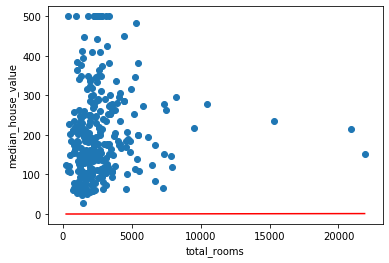

In [12]:
sample = california_housing_dataframe.sample(n=300)

# Get the min and max total_rooms values.
x_0 = sample["total_rooms"].min()
x_1 = sample["total_rooms"].max()

# Retrieve the final weight and bias generated during training.
weight = linear_regressor.get_variable_value('linear/linear_model/total_rooms/weights')[0]
bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')

# Get the predicted median_house_values for the min and max total_rooms values.
y_0 = weight * x_0 + bias 
y_1 = weight * x_1 + bias

# Plot our regression line from (x_0, y_0) to (x_1, y_1).
plt.plot([x_0, x_1], [y_0, y_1], c='r')

# Label the graph axes.
plt.ylabel("median_house_value")
plt.xlabel("total_rooms")

# Plot a scatter plot from our data sample.
plt.scatter(sample["total_rooms"], sample["median_house_value"])

# Display graph.
plt.show()

In [15]:
# For this exercise, we've put all the above code in a single function for convenience. 
# You can call the function with different parameters to see the effect.

# In this function, we'll proceed in 10 evenly divided periods so that 
# we can observe the model improvement at each period.

# For each period, we'll compute and graph training loss. 
# This may help you judge when a model is converged, or if it needs more iterations.

# We'll also plot the feature weight and bias term values learned by the model over time. 
# This is another way to see how things converge.

def train_model(learning_rate, steps, batch_size, input_feature="total_rooms"):
    """Trains a linear regression model of one feature.

    Args:
    learning_rate: A `float`, the learning rate.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    input_feature: A `string` specifying a column from `california_housing_dataframe`
      to use as input feature.
    """
    periods = 10
    steps_per_period = steps / periods

    my_feature = input_feature
    my_feature_data = california_housing_dataframe[[my_feature]]
    my_label = "median_house_value"
    targets = california_housing_dataframe[my_label]

    # Create feature columns.
    feature_columns = [tf.feature_column.numeric_column(my_feature)]

    # Create input functions.
    training_input_fn = lambda:my_input_fn(my_feature_data, targets, batch_size=batch_size)
    prediction_input_fn = lambda: my_input_fn(my_feature_data, targets, num_epochs=1, shuffle=False)

    # Create a linear regressor object.
    my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
    linear_regressor = tf.estimator.LinearRegressor(
      feature_columns=feature_columns,
      optimizer=my_optimizer
    )

    # Set up to plot the state of our model's line each period.
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    plt.title("Learned Line by Period")
    plt.ylabel(my_label)
    plt.xlabel(my_feature)
    sample = california_housing_dataframe.sample(n=300)
    plt.scatter(sample[my_feature], sample[my_label])
    colors = [cm.coolwarm(x) for x in np.linspace(-1, 1, periods)]

    # Train the model, but do so inside a loop so that we can periodically assess
    # loss metrics.
    print("Training model...")
    print("RMSE (on training data):")
    root_mean_squared_errors = []
    for period in range (0, periods):
        # Train the model, starting from the prior state.
        linear_regressor.train(
            input_fn=training_input_fn,
            steps=steps_per_period
        )
        # Take a break and compute predictions.
        predictions = linear_regressor.predict(input_fn=prediction_input_fn)
        predictions = np.array([item['predictions'][0] for item in predictions])

        # Compute loss.
        root_mean_squared_error = math.sqrt(
            metrics.mean_squared_error(predictions, targets))
        # Occasionally print the current loss.
        print("  period %02d : %0.2f" % (period, root_mean_squared_error))
        # Add the loss metrics from this period to our list.
        root_mean_squared_errors.append(root_mean_squared_error)
        # Finally, track the weights and biases over time.
        # Apply some math to ensure that the data and line are plotted neatly.
        y_extents = np.array([0, sample[my_label].max()])

        weight = linear_regressor.get_variable_value('linear/linear_model/%s/weights' % input_feature)[0]
        bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')

        x_extents = (y_extents - bias) / weight
        x_extents = np.maximum(np.minimum(x_extents,
                                          sample[my_feature].max()),
                               sample[my_feature].min())
        y_extents = weight * x_extents + bias
        plt.plot(x_extents, y_extents, color=colors[period]) 
    print("Model training finished.")

    # Output a graph of loss metrics over periods.
    plt.subplot(1, 2, 2)
    plt.ylabel('RMSE')
    plt.xlabel('Periods')
    plt.title("Root Mean Squared Error vs. Periods")
    plt.tight_layout()
    plt.plot(root_mean_squared_errors)

    # Output a table with calibration data.
    calibration_data = pd.DataFrame()
    calibration_data["predictions"] = pd.Series(predictions)
    calibration_data["targets"] = pd.Series(targets)
    display.display(calibration_data.describe())

    print("Final RMSE (on training data): %0.2f" % root_mean_squared_error)

Training model...
RMSE (on training data):
  period 00 : 186.29
  period 01 : 166.32
  period 02 : 166.32
  period 03 : 166.32
  period 04 : 166.32
  period 05 : 166.32
  period 06 : 166.32
  period 07 : 166.32
  period 08 : 167.02
  period 09 : 166.32
Model training finished.


,predictions,targets
count,17000.0,17000.0
mean,132.2,207.3
std,109.0,116.0
min,0.1,15.0
25%,73.1,119.4
50%,106.4,180.4
75%,157.6,265.0
max,1897.1,500.0


Final RMSE (on training data): 166.32


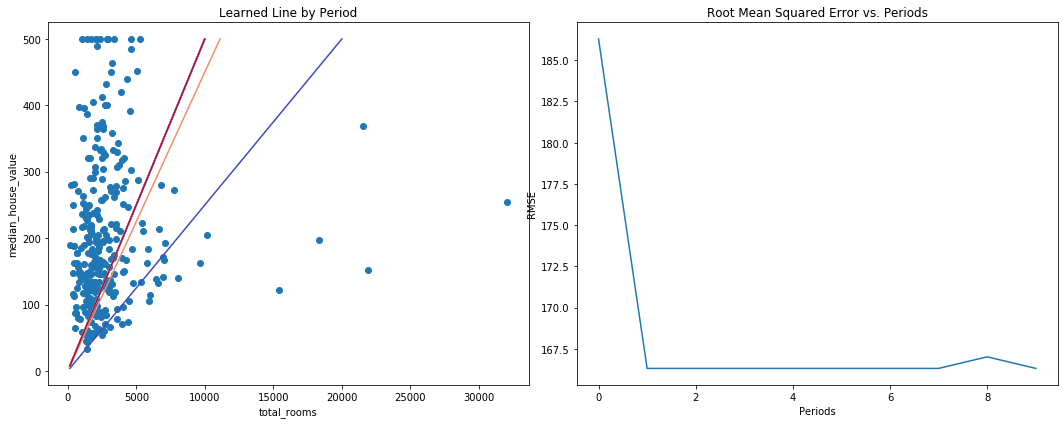

In [25]:
train_model(
    learning_rate=0.0005,
    steps=100,
    batch_size=1000
)

In [ ]:
# Trying a Different Feature

train_model(
    learning_rate=0.000001,
    steps=100,
    batch_size=10,
    input_feature='median_income'
)

### Synthetic Features and Outliers

In [2]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")

california_housing_dataframe = california_housing_dataframe.reindex(
    np.random.permutation(california_housing_dataframe.index))
california_housing_dataframe["median_house_value"] /= 1000.0
california_housing_dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
1273,-117.1,32.7,34.0,1694.0,455.0,1467.0,425.0,2.1,139.4
15306,-122.3,37.8,35.0,948.0,184.0,467.0,169.0,1.8,118.8
16671,-122.8,38.5,23.0,2511.0,549.0,1052.0,527.0,2.5,192.0
8004,-118.4,33.9,43.0,2492.0,449.0,1033.0,437.0,8.0,500.0
514,-117.0,32.7,11.0,1112.0,164.0,441.0,174.0,4.8,169.5
...,...,...,...,...,...,...,...,...,...
15973,-122.4,38.0,13.0,4284.0,1042.0,2146.0,937.0,4.1,179.2
5031,-118.1,34.7,17.0,2479.0,390.0,1219.0,363.0,4.6,125.7
391,-116.9,33.7,19.0,2901.0,445.0,1414.0,475.0,4.6,118.9
6289,-118.2,34.0,32.0,1218.0,342.0,1292.0,304.0,1.6,102.9


In [4]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model of one feature.
  
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
    
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                           
 
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified.
    if shuffle:
        ds = ds.shuffle(buffer_size=10000)
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

In [14]:
def train_model(learning_rate, steps, batch_size, input_feature):
    """Trains a linear regression model.

    Args:
    learning_rate: A `float`, the learning rate.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    input_feature: A `string` specifying a column from `california_housing_dataframe`
      to use as input feature.

    Returns:
    A Pandas `DataFrame` containing targets and the corresponding predictions done
    after training the model.
    """

    periods = 10
    steps_per_period = steps / periods

    my_feature = input_feature
    my_feature_data = california_housing_dataframe[[my_feature]].astype('float32')
    my_label = "median_house_value"
    targets = california_housing_dataframe[my_label].astype('float32')

    # Create input functions.
    training_input_fn = lambda: my_input_fn(my_feature_data, targets, batch_size=batch_size)
    predict_training_input_fn = lambda: my_input_fn(my_feature_data, targets, num_epochs=1, shuffle=False)

    # Create feature columns.
    feature_columns = [tf.feature_column.numeric_column(my_feature)]

    # Create a linear regressor object.
    my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
    linear_regressor = tf.estimator.LinearRegressor(
      feature_columns=feature_columns,
      optimizer=my_optimizer
    )

    # Set up to plot the state of our model's line each period.
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    plt.title("Learned Line by Period")
    plt.ylabel(my_label)
    plt.xlabel(my_feature)
    sample = california_housing_dataframe.sample(n=300)
    plt.scatter(sample[my_feature], sample[my_label])
    colors = [cm.coolwarm(x) for x in np.linspace(-1, 1, periods)]

    # Train the model, but do so inside a loop so that we can periodically assess
    # loss metrics.
    print("Training model...")
    print("RMSE (on training data):")
    root_mean_squared_errors = []
    for period in range (0, periods):
        # Train the model, starting from the prior state.
        linear_regressor.train(
            input_fn=training_input_fn,
            steps=steps_per_period,
        )
        # Take a break and compute predictions.
        predictions = linear_regressor.predict(input_fn=predict_training_input_fn)
        predictions = np.array([item['predictions'][0] for item in predictions])

        # Compute loss.
        root_mean_squared_error = math.sqrt(
          metrics.mean_squared_error(predictions, targets))
        # Occasionally print the current loss.
        print("  period %02d : %0.2f" % (period, root_mean_squared_error))
        # Add the loss metrics from this period to our list.
        root_mean_squared_errors.append(root_mean_squared_error)
        # Finally, track the weights and biases over time.
        # Apply some math to ensure that the data and line are plotted neatly.
        y_extents = np.array([0, sample[my_label].max()])

        weight = linear_regressor.get_variable_value('linear/linear_model/%s/weights' % input_feature)[0]
        bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')

        x_extents = (y_extents - bias) / weight
        x_extents = np.maximum(np.minimum(x_extents,
                                          sample[my_feature].max()),
                               sample[my_feature].min())
        y_extents = weight * x_extents + bias
        plt.plot(x_extents, y_extents, color=colors[period]) 
    print("Model training finished.")

    # Output a graph of loss metrics over periods.
    plt.subplot(1, 2, 2)
    plt.ylabel('RMSE')
    plt.xlabel('Periods')
    plt.title("Root Mean Squared Error vs. Periods")
    plt.tight_layout()
    plt.plot(root_mean_squared_errors)

    # Create a table with calibration data.
    calibration_data = pd.DataFrame()
    calibration_data["predictions"] = pd.Series(predictions)
    calibration_data["targets"] = pd.Series(targets)
    display.display(calibration_data.describe())

    print("Final RMSE (on training data): %0.2f" % root_mean_squared_error)

    return calibration_data

Training model...
RMSE (on training data):
  period 00 : 225.28
  period 01 : 213.35
  period 02 : 202.13
  period 03 : 191.00
  period 04 : 180.40
  period 05 : 170.43
  period 06 : 161.18
  period 07 : 153.95
  period 08 : 147.25
  period 09 : 141.52
Model training finished.


,predictions,targets
count,17000.0,17000.0
mean,138.0,207.3
std,28.1,116.0
min,107.3,15.0
25%,129.6,119.4
50%,133.8,180.4
75%,141.4,265.0
max,3063.4,500.0


Final RMSE (on training data): 141.52


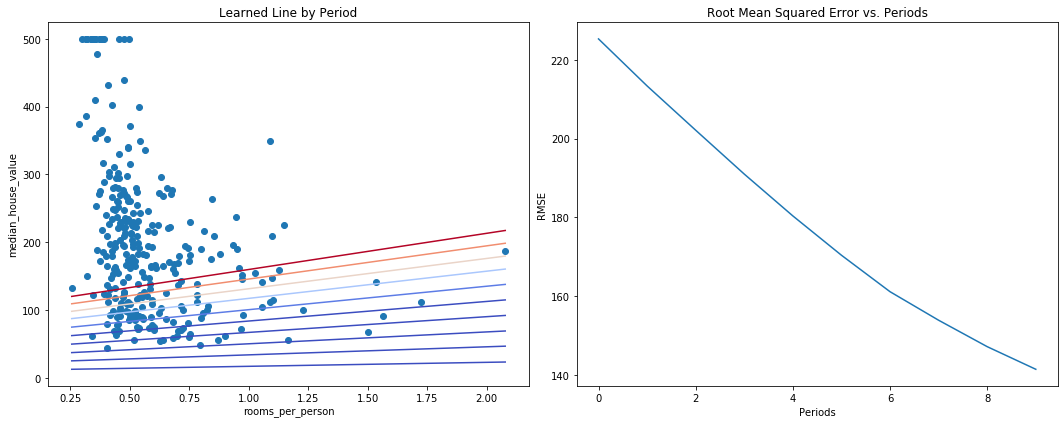

In [15]:
# Create a feature representing population density
california_housing_dataframe["rooms_per_person"] = california_housing_dataframe['population']/ \
                                                    california_housing_dataframe['total_rooms']

calibration_data = train_model(
    learning_rate=0.05,
    steps=500,
    batch_size=5,
    input_feature="rooms_per_person")

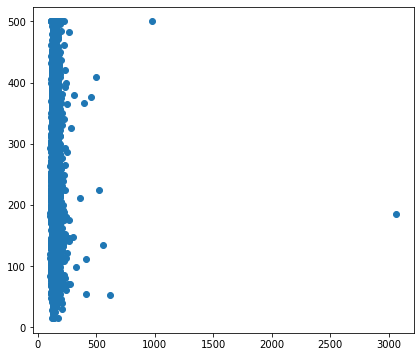

In [16]:
# To visualize the performance of the modelw, we inspect scatter plot of predictions vs. target values.

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.scatter(calibration_data["predictions"], calibration_data["targets"])

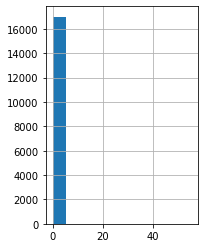

In [17]:
# Checking rooms per person for outliers
plt.subplot(1, 2, 2)
_ = california_housing_dataframe["rooms_per_person"].hist()

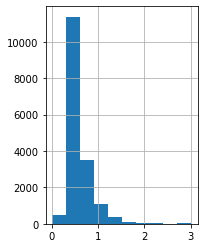

In [22]:
# Clipping the outliers
california_housing_dataframe["clipped_room_per_person"] =  california_housing_dataframe["rooms_per_person"
                                                                                       ].apply(lambda x: min(x, 3))

plt.subplot(1, 2, 2)
_ = california_housing_dataframe["clipped_room_per_person"].hist()

Training model...
RMSE (on training data):
  period 00 : 225.31
  period 01 : 213.35
  period 02 : 201.76
  period 03 : 190.54
  period 04 : 179.81
  period 05 : 169.64
  period 06 : 160.13
  period 07 : 152.12
  period 08 : 145.47
  period 09 : 139.72
Model training finished.


,predictions,targets
count,17000.0,17000.0
mean,137.6,207.3
std,13.9,116.0
min,107.3,15.0
25%,129.5,119.4
50%,133.8,180.4
75%,141.3,265.0
max,266.1,500.0


Final RMSE (on training data): 139.72


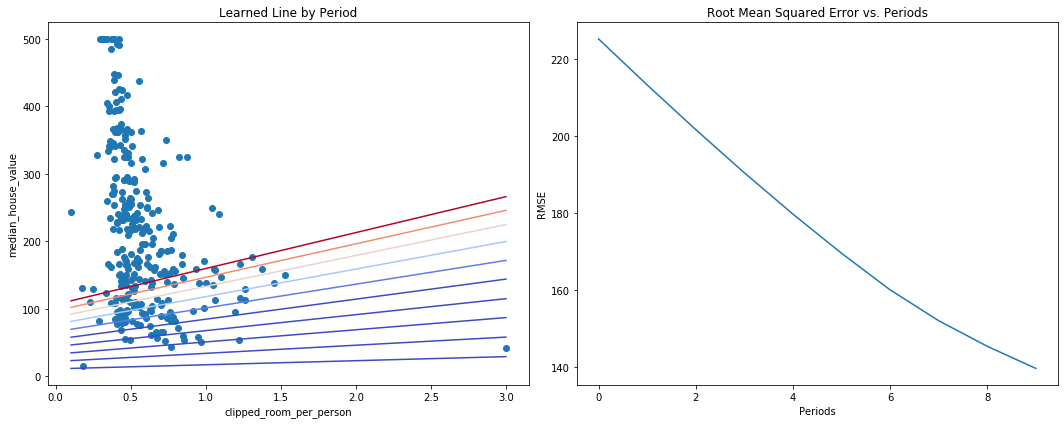

In [23]:
calibration_data = train_model(
    learning_rate=0.05,
    steps=500,
    batch_size=5,
    input_feature="clipped_room_per_person")

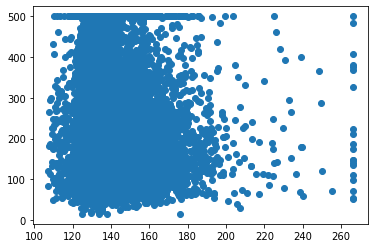

In [24]:
plt.scatter(calibration_data["predictions"], calibration_data["targets"])

### Validation Set

In [3]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")

california_housing_dataframe = california_housing_dataframe.reindex(
    np.random.permutation(california_housing_dataframe.index))

In [4]:
def preprocess_features(california_housing_dataframe):
    """Prepares input features from California housing data set.

    Args:
    california_housing_dataframe: A Pandas DataFrame expected to contain data
      from the California housing data set.
    Returns:
    A DataFrame that contains the features to be used for the model, including
    synthetic features.
    """
    selected_features = california_housing_dataframe[
    ["latitude",
     "longitude",
     "housing_median_age",
     "total_rooms",
     "total_bedrooms",
     "population",
     "households",
     "median_income"]]
    processed_features = selected_features.copy()
    # Create a synthetic feature.
    processed_features["rooms_per_person"] = (
    california_housing_dataframe["total_rooms"] /
    california_housing_dataframe["population"])
    return processed_features

def preprocess_targets(california_housing_dataframe):
    """Prepares target features (i.e., labels) from California housing data set.

    Args:
    california_housing_dataframe: A Pandas DataFrame expected to contain data
      from the California housing data set.
    Returns:
    A DataFrame that contains the target feature.
    """
    output_targets = pd.DataFrame()
    # Scale the target to be in units of thousands of dollars.
    output_targets["median_house_value"] = (
    california_housing_dataframe["median_house_value"] / 1000.0)
    return output_targets

In [5]:
# For the training set, we'll choose the first 12000 examples, out of the total of 17000.
training_examples = preprocess_features(california_housing_dataframe.head(12000))
training_examples.describe()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0
mean,35.6,-119.6,28.6,2659.3,541.6,1432.5,503.0,3.9,2.0
std,2.1,2.0,12.6,2234.0,427.5,1183.1,390.3,1.9,1.3
min,32.5,-124.3,1.0,8.0,1.0,3.0,1.0,0.5,0.1
25%,33.9,-121.8,18.0,1469.8,298.0,791.0,283.0,2.6,1.5
50%,34.3,-118.5,29.0,2135.0,435.5,1168.0,410.0,3.5,1.9
75%,37.7,-118.0,37.0,3144.0,647.0,1716.2,602.0,4.8,2.3
max,42.0,-114.3,52.0,37937.0,6445.0,35682.0,6082.0,15.0,55.2


In [6]:
training_targets = preprocess_targets(california_housing_dataframe.head(12000))
training_targets.describe()

,median_house_value
count,12000.0
mean,207.5
std,116.0
min,15.0
25%,120.6
50%,180.4
75%,264.7
max,500.0


In [7]:
# For the validation set, we'll choose the last 5000 examples, out of the total of 17000.
validation_examples = preprocess_features(california_housing_dataframe.tail(5000))
validation_examples.describe()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
mean,35.6,-119.5,28.7,2606.1,534.2,1422.6,496.9,3.9,2.0
std,2.2,2.0,12.6,2044.0,406.8,1058.4,370.3,1.9,0.9
min,32.6,-124.3,2.0,2.0,2.0,6.0,2.0,0.5,0.0
25%,33.9,-121.8,18.0,1435.8,294.0,786.0,278.0,2.6,1.5
50%,34.2,-118.5,29.0,2113.5,429.0,1166.0,404.5,3.5,1.9
75%,37.7,-118.0,37.0,3171.0,654.0,1737.0,612.0,4.8,2.3
max,41.9,-114.5,52.0,21113.0,4386.0,10323.0,3886.0,15.0,29.4


In [8]:
validation_targets = preprocess_targets(california_housing_dataframe.tail(5000))
validation_targets.describe()

,median_house_value
count,5000.0
mean,206.8
std,116.0
min,15.0
25%,118.1
50%,180.4
75%,265.9
max,500.0


**observations about the data**
- median_income is on a scale from about 3 to 15. It's not at all clear what this scale refers to—looks like maybe some log scale? It's not documented anywhere; all we can assume is that higher values correspond to higher income.

- The maximum median_house_value is 500,001. This looks like an artificial cap of some kind.

- Our rooms_per_person feature is generally on a sane scale, with a 75th percentile value of about 2. But there are some very large values, like 18 or 55, which may show some amount of corruption in the data.


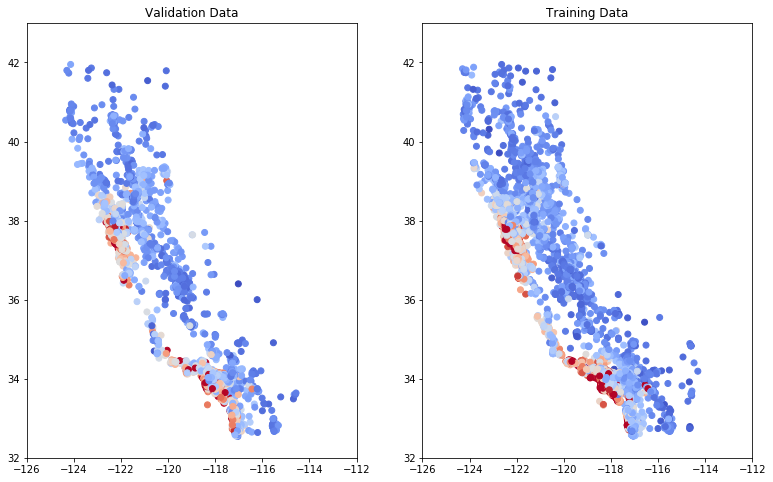

In [37]:
# Let's take a close look at two features in particular: latitude and longitude. 
# These are geographical coordinates of the city block in question.
# This might make a nice visualization — let's plot latitude and longitude, 
# and use color to show the median_house_value.

plt.figure(figsize=(13, 8))

ax = plt.subplot(1, 2, 1)
ax.set_title("Validation Data")

ax.set_autoscaley_on(False)
ax.set_ylim([32, 43])
ax.set_autoscalex_on(False)
ax.set_xlim([-126, -112])
plt.scatter(validation_examples["longitude"],
            validation_examples["latitude"],
            cmap="coolwarm",
            c=validation_targets["median_house_value"] / validation_targets["median_house_value"].max())

ax = plt.subplot(1,2,2)
ax.set_title("Training Data")

ax.set_autoscaley_on(False)
ax.set_ylim([32, 43])
ax.set_autoscalex_on(False)
ax.set_xlim([-126, -112])
plt.scatter(training_examples["longitude"],
            training_examples["latitude"],
            cmap="coolwarm",
            c=training_targets["median_house_value"] / training_targets["median_house_value"].max())
_ = plt.plot()

In [10]:
# Randmomizing before train validation split
california_housing_dataframe = california_housing_dataframe.reindex(
    np.random.permutation(california_housing_dataframe.index))


training_examples = preprocess_features(california_housing_dataframe.head(12000))
training_targets = preprocess_targets(california_housing_dataframe.head(12000))
validation_targets = preprocess_targets(california_housing_dataframe.tail(5000))
validation_examples = preprocess_features(california_housing_dataframe.tail(5000))

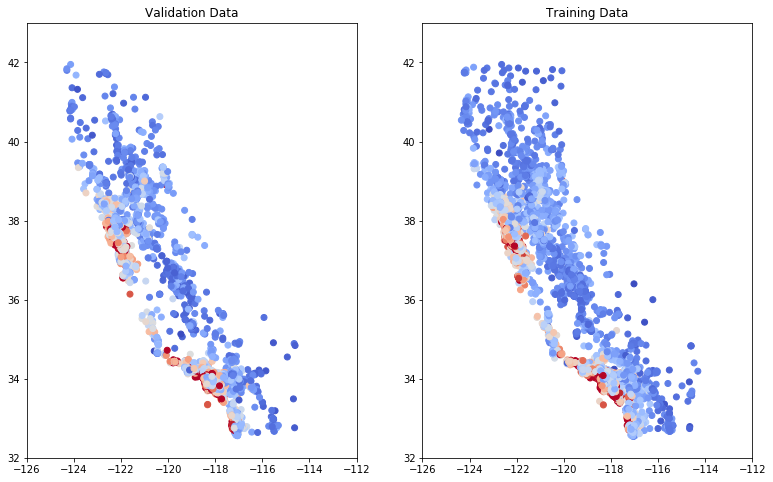

In [11]:
# Replotting 
plt.figure(figsize=(13, 8))

ax = plt.subplot(1, 2, 1)
ax.set_title("Validation Data")

ax.set_autoscaley_on(False)
ax.set_ylim([32, 43])
ax.set_autoscalex_on(False)
ax.set_xlim([-126, -112])
plt.scatter(validation_examples["longitude"],
            validation_examples["latitude"],
            cmap="coolwarm",
            c=validation_targets["median_house_value"] / validation_targets["median_house_value"].max())

ax = plt.subplot(1,2,2)
ax.set_title("Training Data")

ax.set_autoscaley_on(False)
ax.set_ylim([32, 43])
ax.set_autoscalex_on(False)
ax.set_xlim([-126, -112])
plt.scatter(training_examples["longitude"],
            training_examples["latitude"],
            cmap="coolwarm",
            c=training_targets["median_house_value"] / training_targets["median_house_value"].max())
_ = plt.plot()

In [12]:
#  Let's define the same input function we've used previously for loading the data into a TensorFlow model.

def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model of multiple features.

    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """

    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                           

    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)

    # Shuffle the data, if specified.
    if shuffle:
        ds = ds.shuffle(10000)

    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

In [13]:
# Because we're now working with multiple input features, 
# let's modularize our code for configuring feature columns into a separate function

def construct_feature_columns(input_features):
    """Construct the TensorFlow Feature Columns.

    Args:
    input_features: The names of the numerical input features to use.
    Returns:
    A set of feature columns
    """ 
    return set([tf.feature_column.numeric_column(my_feature)
              for my_feature in input_features])

In [14]:
def train_model(
    learning_rate,
    steps,
    batch_size,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
    """Trains a linear regression model of multiple features.

    In addition to training, this function also prints training progress information,
    as well as a plot of the training and validation loss over time.

    Args:
    learning_rate: A `float`, the learning rate.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    training_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for training.
    training_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for training.
    validation_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for validation.
    validation_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for validation.

    Returns:
    A `LinearRegressor` object trained on the training data.
    """

    periods = 10
    steps_per_period = steps / periods

    # Create a linear regressor object.
    my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
    linear_regressor = tf.estimator.LinearRegressor(
      feature_columns=construct_feature_columns(training_examples),
      optimizer=my_optimizer
    )

    # Create input functions.
    training_input_fn = lambda: my_input_fn(
      training_examples, 
      training_targets["median_house_value"], 
      batch_size=batch_size)
    predict_training_input_fn = lambda: my_input_fn(
      training_examples, 
      training_targets["median_house_value"], 
      num_epochs=1, 
      shuffle=False)
    predict_validation_input_fn = lambda: my_input_fn(
      validation_examples, validation_targets["median_house_value"], 
      num_epochs=1, 
      shuffle=False)

    # Train the model, but do so inside a loop so that we can periodically assess
    # loss metrics.
    print("Training model...")
    print("RMSE (on training data):")
    training_rmse = []
    validation_rmse = []
    for period in range (0, periods):
        # Train the model, starting from the prior state.
        linear_regressor.train(
            input_fn=training_input_fn,
            steps=steps_per_period,
        )
        # Take a break and compute predictions.
        training_predictions = linear_regressor.predict(input_fn=predict_training_input_fn)
        training_predictions = np.array([item['predictions'][0] for item in training_predictions])

        validation_predictions = linear_regressor.predict(input_fn=predict_validation_input_fn)
        validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])


        # Compute training and validation loss.
        training_root_mean_squared_error = math.sqrt(
            metrics.mean_squared_error(training_predictions, training_targets))
        validation_root_mean_squared_error = math.sqrt(
            metrics.mean_squared_error(validation_predictions, validation_targets))
        # Occasionally print the current loss.
        print("  period %02d : %0.2f" % (period, training_root_mean_squared_error))
        # Add the loss metrics from this period to our list.
        training_rmse.append(training_root_mean_squared_error)
        validation_rmse.append(validation_root_mean_squared_error)
    print("Model training finished.")

    # Output a graph of loss metrics over periods.
    plt.ylabel("RMSE")
    plt.xlabel("Periods")
    plt.title("Root Mean Squared Error vs. Periods")
    plt.tight_layout()
    plt.plot(training_rmse, label="training")
    plt.plot(validation_rmse, label="validation")
    plt.legend()

    return linear_regressor

Training model...
RMSE (on training data):
  period 00 : 180.57
  period 01 : 166.74
  period 02 : 166.70
  period 03 : 166.57
  period 04 : 167.62
  period 05 : 168.78
  period 06 : 166.92
  period 07 : 165.55
  period 08 : 164.79
  period 09 : 164.73
Model training finished.


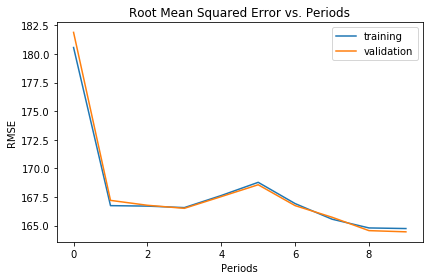

In [15]:
linear_regressor = train_model(
    # TWEAK THESE VALUES TO SEE HOW MUCH YOU CAN IMPROVE THE RMSE
    learning_rate=0.0005,
    steps=100,
    batch_size=50,
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

### Representation: Programming Exercise

In [16]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")

california_housing_dataframe = california_housing_dataframe.reindex(
    np.random.permutation(california_housing_dataframe.index))

In [17]:
def preprocess_features(california_housing_dataframe):
    """Prepares input features from California housing data set.

    Args:
    california_housing_dataframe: A Pandas DataFrame expected to contain data
      from the California housing data set.
    Returns:
    A DataFrame that contains the features to be used for the model, including
    synthetic features.
    """
    selected_features = california_housing_dataframe[
    ["latitude",
     "longitude",
     "housing_median_age",
     "total_rooms",
     "total_bedrooms",
     "population",
     "households",
     "median_income"]]
    processed_features = selected_features.copy()
    # Create a synthetic feature.
    processed_features["rooms_per_person"] = (
    california_housing_dataframe["total_rooms"] /
    california_housing_dataframe["population"])
    return processed_features

def preprocess_targets(california_housing_dataframe):
    """Prepares target features (i.e., labels) from California housing data set.

    Args:
    california_housing_dataframe: A Pandas DataFrame expected to contain data
      from the California housing data set.
    Returns:
    A DataFrame that contains the target feature.
    """
    output_targets = pd.DataFrame()
    # Scale the target to be in units of thousands of dollars.
    output_targets["median_house_value"] = (
    california_housing_dataframe["median_house_value"] / 1000.0)
    return output_targets

In [18]:
# Choose the first 12000 (out of 17000) examples for training.
training_examples = preprocess_features(california_housing_dataframe.head(12000))
training_targets = preprocess_targets(california_housing_dataframe.head(12000))

# Choose the last 5000 (out of 17000) examples for validation.
validation_examples = preprocess_features(california_housing_dataframe.tail(5000))
validation_targets = preprocess_targets(california_housing_dataframe.tail(5000))

# Double-check that we've done the right thing.
print("Training examples summary:")
display.display(training_examples.describe())
print("Validation examples summary:")
display.display(validation_examples.describe())

print("Training targets summary:")
display.display(training_targets.describe())
print("Validation targets summary:")
display.display(validation_targets.describe())

Training examples summary:


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0
mean,35.6,-119.6,28.7,2638.0,538.7,1424.9,500.7,3.9,2.0
std,2.1,2.0,12.6,2160.7,415.1,1133.6,379.8,1.9,1.2
min,32.5,-124.3,1.0,2.0,1.0,3.0,1.0,0.5,0.0
25%,33.9,-121.8,18.0,1463.0,297.0,790.0,282.0,2.6,1.5
50%,34.3,-118.5,29.0,2127.0,434.0,1164.0,409.0,3.5,1.9
75%,37.7,-118.0,37.0,3157.0,651.0,1717.2,607.0,4.8,2.3
max,42.0,-114.3,52.0,37937.0,5471.0,35682.0,5189.0,15.0,55.2


Validation examples summary:


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
mean,35.6,-119.5,28.4,2657.2,541.0,1440.7,502.5,3.9,2.0
std,2.1,2.0,12.6,2225.7,436.4,1181.3,395.6,1.9,1.0
min,32.5,-124.3,1.0,12.0,3.0,8.0,4.0,0.5,0.1
25%,33.9,-121.8,18.0,1460.0,296.0,788.0,280.0,2.6,1.5
50%,34.2,-118.5,29.0,2130.0,434.0,1173.0,408.0,3.5,1.9
75%,37.7,-118.0,37.0,3129.2,643.0,1728.0,598.0,4.8,2.3
max,42.0,-114.6,52.0,32627.0,6445.0,28566.0,6082.0,15.0,26.5


Training targets summary:


,median_house_value
count,12000.0
mean,208.0
std,116.5
min,15.0
25%,120.0
50%,181.3
75%,265.6
max,500.0


Validation targets summary:


,median_house_value
count,5000.0
mean,205.6
std,114.6
min,15.0
25%,118.5
50%,178.1
75%,263.7
max,500.0


In [19]:
correlation_dataframe = training_examples.copy()
correlation_dataframe["target"] = training_targets["median_house_value"]

correlation_dataframe.corr()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person,target
latitude,1.0,-0.9,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,0.1,-0.1
longitude,-0.9,1.0,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.1,-0.1
housing_median_age,0.0,-0.1,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,-0.1,0.1
total_rooms,-0.0,0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1,0.1
total_bedrooms,-0.1,0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0,0.1
population,-0.1,0.1,-0.3,0.9,0.9,1.0,0.9,0.0,-0.1,-0.0
households,-0.1,0.1,-0.3,0.9,1.0,0.9,1.0,0.0,-0.0,0.1
median_income,-0.1,-0.0,-0.1,0.2,-0.0,0.0,0.0,1.0,0.2,0.7
rooms_per_person,0.1,-0.1,-0.1,0.1,0.0,-0.1,-0.0,0.2,1.0,0.2
target,-0.1,-0.1,0.1,0.1,0.1,-0.0,0.1,0.7,0.2,1.0


Features that have strong positive or negative correlations with the target will add information to our model. We can use the correlation matrix to find such strongly correlated features.

We'd also like to have features that aren't so strongly correlated with each other, so that they add independent information.

Use this information to try removing features. You can also try developing additional synthetic features, such as ratios of two raw features.

In [21]:
def construct_feature_columns(input_features):
    """Construct the TensorFlow Feature Columns.

    Args:
    input_features: The names of the numerical input features to use.
    Returns:
    A set of feature columns
    """ 
    return set([tf.feature_column.numeric_column(my_feature)
              for my_feature in input_features])

In [22]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model.

    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """

    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                           

    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)

    # Shuffle the data, if specified.
    if shuffle:
        ds = ds.shuffle(10000)

    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

In [23]:
def train_model(
    learning_rate,
    steps,
    batch_size,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
    """Trains a linear regression model.

    In addition to training, this function also prints training progress information,
    as well as a plot of the training and validation loss over time.

    Args:
    learning_rate: A `float`, the learning rate.
    steps: A non-zero `int`, the total number of training steps. A training step
    consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    training_examples: A `DataFrame` containing one or more columns from
    `california_housing_dataframe` to use as input features for training.
    training_targets: A `DataFrame` containing exactly one column from
    `california_housing_dataframe` to use as target for training.
    validation_examples: A `DataFrame` containing one or more columns from
    `california_housing_dataframe` to use as input features for validation.
    validation_targets: A `DataFrame` containing exactly one column from
    `california_housing_dataframe` to use as target for validation.

    Returns:
    A `LinearRegressor` object trained on the training data.
    """

    periods = 10
    steps_per_period = steps / periods

    # Create a linear regressor object.
    my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
    linear_regressor = tf.estimator.LinearRegressor(
    feature_columns=construct_feature_columns(training_examples),
    optimizer=my_optimizer
    )

    # Create input functions.
    training_input_fn = lambda: my_input_fn(training_examples, 
                                      training_targets["median_house_value"], 
                                      batch_size=batch_size)
    predict_training_input_fn = lambda: my_input_fn(training_examples, 
                                              training_targets["median_house_value"], 
                                              num_epochs=1, 
                                              shuffle=False)
    predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                validation_targets["median_house_value"], 
                                                num_epochs=1, 
                                                shuffle=False)

    # Train the model, but do so inside a loop so that we can periodically assess
    # loss metrics.
    print("Training model...")
    print("RMSE (on training data):")
    training_rmse = []
    validation_rmse = []
    for period in range (0, periods):
        # Train the model, starting from the prior state.
        linear_regressor.train(
        input_fn=training_input_fn,
        steps=steps_per_period,
        )
        # Take a break and compute predictions.
        training_predictions = linear_regressor.predict(input_fn=predict_training_input_fn)
        training_predictions = np.array([item['predictions'][0] for item in training_predictions])

        validation_predictions = linear_regressor.predict(input_fn=predict_validation_input_fn)
        validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])

        # Compute training and validation loss.
        training_root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(training_predictions, training_targets))
        validation_root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(validation_predictions, validation_targets))
        # Occasionally print the current loss.
        print("  period %02d : %0.2f" % (period, training_root_mean_squared_error))
        # Add the loss metrics from this period to our list.
        training_rmse.append(training_root_mean_squared_error)
        validation_rmse.append(validation_root_mean_squared_error)
    print("Model training finished.")


    # Output a graph of loss metrics over periods.
    plt.ylabel("RMSE")
    plt.xlabel("Periods")
    plt.title("Root Mean Squared Error vs. Periods")
    plt.tight_layout()
    plt.plot(training_rmse, label="training")
    plt.plot(validation_rmse, label="validation")
    plt.legend()

    return linear_regressor

In [24]:
training_examples.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_person'],
      dtype='object')

Training model...
RMSE (on training data):
  period 00 : 166.44
  period 01 : 128.84
  period 02 : 118.43
  period 03 : 116.66
  period 04 : 116.09
  period 05 : 115.50
  period 06 : 115.04
  period 07 : 114.45
  period 08 : 115.35
  period 09 : 114.16
Model training finished.


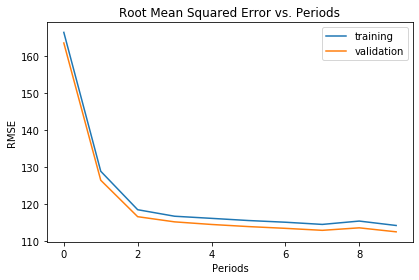

In [35]:
minimal_features = [
  "median_income",
  "latitude",
]

assert minimal_features, "You must select at least one feature!"

minimal_training_examples = training_examples[minimal_features]
minimal_validation_examples = validation_examples[minimal_features]

_ = train_model(
    learning_rate=0.01,
    steps=500,
    batch_size=5,
    training_examples=minimal_training_examples,
    training_targets=training_targets,
    validation_examples=minimal_validation_examples,
    validation_targets=validation_targets)

Plotting latitude vs. median_house_value shows that there really isn't a linear relationship there.

Instead, there are a couple of peaks, which roughly correspond to Los Angeles and San Francisco.

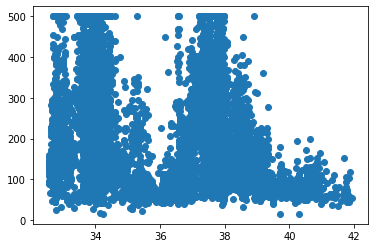

In [27]:
plt.scatter(training_examples["latitude"], training_targets["median_house_value"])

Aside from latitude, we'll also keep median_income, to compare with the previous results.

We decided to bucketize the latitude. This is fairly straightforward in Pandas using Series.apply.

In [33]:
def select_and_transform_features(source_df):
    LATITUDE_RANGES = zip(range(32, 44), range(33, 45))
    selected_examples = pd.DataFrame()
    selected_examples["median_income"] = source_df["median_income"]
    for r in LATITUDE_RANGES:
        selected_examples["latitude_%d_to_%d" % r] = source_df["latitude"].apply(
            lambda l: 1.0 if l >= r[0] and l < r[1] else 0.0)
    return selected_examples

selected_training_examples = select_and_transform_features(training_examples)
selected_validation_examples = select_and_transform_features(validation_examples)

Training model...
RMSE (on training data):
  period 00 : 207.83
  period 01 : 178.05
  period 02 : 149.78
  period 03 : 123.89
  period 04 : 103.04
  period 05 : 90.87
  period 06 : 85.45
  period 07 : 84.68
  period 08 : 84.16
  period 09 : 84.00
Model training finished.


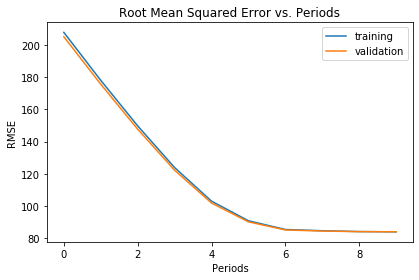

In [36]:
_ = train_model(
    learning_rate=0.03,
    steps=500,
    batch_size=5,
    training_examples=selected_training_examples,
    training_targets=training_targets,
    validation_examples=selected_validation_examples,
    validation_targets=validation_targets)

### Feature Crosses: Programming Exercise

In [1]:
import math
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")

california_housing_dataframe = california_housing_dataframe.reindex(
    np.random.permutation(california_housing_dataframe.index))

In [2]:
def preprocess_features(california_housing_dataframe):
    """Prepares input features from California housing data set.

    Args:
    california_housing_dataframe: A Pandas DataFrame expected to contain data
      from the California housing data set.
    Returns:
    A DataFrame that contains the features to be used for the model, including
    synthetic features.
    """
    selected_features = california_housing_dataframe[
    ["latitude",
     "longitude",
     "housing_median_age",
     "total_rooms",
     "total_bedrooms",
     "population",
     "households",
     "median_income"]]
    processed_features = selected_features.copy()
    # Create a synthetic feature.
    processed_features["rooms_per_person"] = (
    california_housing_dataframe["total_rooms"] /
    california_housing_dataframe["population"])
    return processed_features

def preprocess_targets(california_housing_dataframe):
    """Prepares target features (i.e., labels) from California housing data set.

    Args:
    california_housing_dataframe: A Pandas DataFrame expected to contain data
      from the California housing data set.
    Returns:
    A DataFrame that contains the target feature.
    """
    output_targets = pd.DataFrame()
    # Scale the target to be in units of thousands of dollars.
    output_targets["median_house_value"] = (
    california_housing_dataframe["median_house_value"] / 1000.0)
    return output_targets

In [3]:
# Choose the first 12000 (out of 17000) examples for training.
training_examples = preprocess_features(california_housing_dataframe.head(12000))
training_targets = preprocess_targets(california_housing_dataframe.head(12000))

# Choose the last 5000 (out of 17000) examples for validation.
validation_examples = preprocess_features(california_housing_dataframe.tail(5000))
validation_targets = preprocess_targets(california_housing_dataframe.tail(5000))

# Double-check that we've done the right thing.
print("Training examples summary:")
display.display(training_examples.describe())
print("Validation examples summary:")
display.display(validation_examples.describe())

print("Training targets summary:")
display.display(training_targets.describe())
print("Validation targets summary:")
display.display(validation_targets.describe())

Training examples summary:


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0
mean,35.6,-119.6,28.6,2628.8,535.2,1414.9,497.4,3.9,2.0
std,2.1,2.0,12.6,2141.9,412.1,1091.6,377.6,1.9,1.2
min,32.5,-124.3,1.0,8.0,1.0,3.0,1.0,0.5,0.0
25%,33.9,-121.8,18.0,1463.0,296.0,790.0,281.0,2.6,1.5
50%,34.2,-118.5,29.0,2128.0,434.0,1160.0,408.0,3.5,1.9
75%,37.7,-118.0,37.0,3136.2,644.0,1707.0,598.0,4.8,2.3
max,42.0,-114.5,52.0,37937.0,5471.0,16122.0,5189.0,15.0,55.2


Validation examples summary:


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
mean,35.6,-119.6,28.5,2679.3,549.6,1464.8,510.3,3.9,2.0
std,2.1,2.0,12.6,2268.4,443.1,1272.2,400.6,1.9,1.0
min,32.5,-124.2,1.0,2.0,2.0,6.0,2.0,0.5,0.1
25%,33.9,-121.8,18.0,1462.0,297.0,788.0,283.0,2.5,1.5
50%,34.3,-118.5,29.0,2124.5,435.0,1188.0,410.0,3.5,1.9
75%,37.7,-118.0,37.0,3175.5,662.2,1757.0,614.0,4.8,2.3
max,42.0,-114.3,52.0,32627.0,6445.0,35682.0,6082.0,15.0,34.2


Training targets summary:


,median_house_value
count,12000.0
mean,208.1
std,116.7
min,15.0
25%,119.0
50%,181.2
75%,265.8
max,500.0


Validation targets summary:


,median_house_value
count,5000.0
mean,205.4
std,114.3
min,15.0
25%,120.8
50%,178.1
75%,262.6
max,500.0


In [4]:
def construct_feature_columns(input_features):
    """Construct the TensorFlow Feature Columns.

    Args:
    input_features: The names of the numerical input features to use.
    Returns:
    A set of feature columns
    """
    return set([tf.feature_column.numeric_column(my_feature)
              for my_feature in input_features])

In [5]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model.

    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """

    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                           

    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)

    # Shuffle the data, if specified.
    if shuffle:
        ds = ds.shuffle(10000)

    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

__FTRL Optimization Algorithm__

High dimensional linear models benefit from using a variant of gradient-based optimization called FTRL. This algorithm has the benefit of scaling the learning rate differently for different coefficients, which can be useful if some features rarely take non-zero values (it also is well suited to support L1 regularization). We can apply FTRL using the [FtrlOptimizer](https://www.tensorflow.org/api_docs/python/tf/train/FtrlOptimizer)

In [6]:
def train_model(
    learning_rate,
    steps,
    batch_size,
    feature_columns,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
    """Trains a linear regression model.

    In addition to training, this function also prints training progress information,
    as well as a plot of the training and validation loss over time.

    Args:
    learning_rate: A `float`, the learning rate.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    feature_columns: A `set` specifying the input feature columns to use.
    training_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for training.
    training_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for training.
    validation_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for validation.
    validation_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for validation.

    Returns:
    A `LinearRegressor` object trained on the training data.
    """
    periods = 10
    steps_per_period = steps / periods

    # Create a linear regressor object.
    my_optimizer = tf.train.FtrlOptimizer(learning_rate=learning_rate)
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
    linear_regressor = tf.estimator.LinearRegressor(
      feature_columns=feature_columns,
      optimizer=my_optimizer
    )

    training_input_fn = lambda: my_input_fn(training_examples, 
                                          training_targets["median_house_value"], 
                                          batch_size=batch_size)
    predict_training_input_fn = lambda: my_input_fn(training_examples, 
                                                  training_targets["median_house_value"], 
                                                  num_epochs=1, 
                                                  shuffle=False)
    predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                    validation_targets["median_house_value"], 
                                                    num_epochs=1, 
                                                    shuffle=False)

    # Train the model, but do so inside a loop so that we can periodically assess
    # loss metrics.
    print("Training model...")
    print("RMSE (on training data):")
    training_rmse = []
    validation_rmse = []
    for period in range (0, periods):
        # Train the model, starting from the prior state.
        linear_regressor.train(
            input_fn=training_input_fn,
            steps=steps_per_period
        )
        # Take a break and compute predictions.
        training_predictions = linear_regressor.predict(input_fn=predict_training_input_fn)
        training_predictions = np.array([item['predictions'][0] for item in training_predictions])
        validation_predictions = linear_regressor.predict(input_fn=predict_validation_input_fn)
        validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])

        # Compute training and validation loss.
        training_root_mean_squared_error = math.sqrt(
            metrics.mean_squared_error(training_predictions, training_targets))
        validation_root_mean_squared_error = math.sqrt(
            metrics.mean_squared_error(validation_predictions, validation_targets))
        # Occasionally print the current loss.
        print("  period %02d : %0.2f" % (period, training_root_mean_squared_error))
        # Add the loss metrics from this period to our list.
        training_rmse.append(training_root_mean_squared_error)
        validation_rmse.append(validation_root_mean_squared_error)
    print("Model training finished.")


    # Output a graph of loss metrics over periods.
    plt.ylabel("RMSE")
    plt.xlabel("Periods")
    plt.title("Root Mean Squared Error vs. Periods")
    plt.tight_layout()
    plt.plot(training_rmse, label="training")
    plt.plot(validation_rmse, label="validation")
    plt.legend()

    return linear_regressor

Training model...
RMSE (on training data):
  period 00 : 132.20
  period 01 : 117.90
  period 02 : 111.83
  period 03 : 109.72
  period 04 : 111.86
  period 05 : 110.31
  period 06 : 110.24
  period 07 : 106.49
  period 08 : 106.17
  period 09 : 106.60
Model training finished.


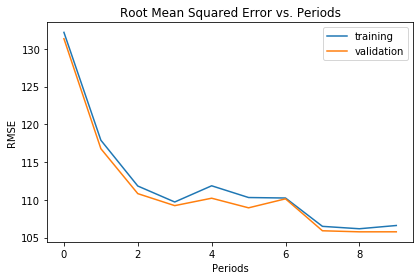

In [12]:
_ = train_model(
    learning_rate=0.075,
    steps=500,
    batch_size=100,
    feature_columns=construct_feature_columns(training_examples),
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

__One-Hot Encoding for Discrete Features__

Discrete (i.e. strings, enumerations, integers) features are usually converted into families of binary features before training a logistic regression model.

For example, suppose we created a synthetic feature that can take any of the values `0`, `1` or `2`, and that we have a few training points:

| # | feature_value |
|---|---------------|
| 0 |             2 |
| 1 |             0 |
| 2 |             1 |

For each possible categorical value, we make a new **binary** feature of **real values** that can take one of just two possible values: 1.0 if the example has that value, and 0.0 if not. In the example above, the categorical feature would be converted into three features, and the training points now look like:

| # | feature_value_0 | feature_value_1 | feature_value_2 |
|---|-----------------|-----------------|-----------------|
| 0 |             0.0 |             0.0 |             1.0 |
| 1 |             1.0 |             0.0 |             0.0 |
| 2 |             0.0 |             1.0 |             0.0 |

__Bucketized (Binned) Features__

Bucketization is also known as binning.

We can bucketize `population` into the following 3 buckets (for instance):
- `bucket_0` (`< 5000`): corresponding to less populated blocks
- `bucket_1` (`5000 - 25000`): corresponding to mid populated blocks
- `bucket_2` (`> 25000`): corresponding to highly populated blocks

Given the preceding bucket definitions, the following `population` vector:

    [[10001], [42004], [2500], [18000]]

becomes the following bucketized feature vector:

    [[1], [2], [0], [1]]

The feature values are now the bucket indices. Note that these indices are considered to be discrete features. Typically, these will be further converted in one-hot representations as above, but this is done transparently.

To define feature columns for bucketized features, instead of using `numeric_column`, we can use [`bucketized_column`](https://www.tensorflow.org/api_docs/python/tf/feature_column/bucketized_column), which takes a numeric column as input and transforms it to a bucketized feature using the bucket boundaries specified in the `boundaries` argument. The following code defines bucketized feature columns for `households` and `longitude`; the `get_quantile_based_boundaries` function calculates boundaries based on quantiles, so that each bucket contains an equal number of elements.

In [7]:
def get_quantile_based_boundaries(feature_values, num_buckets):
    boundaries = np.arange(1.0, num_buckets) / num_buckets
    quantiles = feature_values.quantile(boundaries)
    return [quantiles[q] for q in quantiles.keys()]

# Divide households into 7 buckets.
households = tf.feature_column.numeric_column("households")
bucketized_households = tf.feature_column.bucketized_column(
  households, boundaries=get_quantile_based_boundaries(
    california_housing_dataframe["households"], 7))

# Divide longitude into 10 buckets.
longitude = tf.feature_column.numeric_column("longitude")
bucketized_longitude = tf.feature_column.bucketized_column(
  longitude, boundaries=get_quantile_based_boundaries(
    california_housing_dataframe["longitude"], 10))

__Task 1: Train the Model on Bucketized Feature Columns__
**Bucketize all the real valued features in our example, train the model and see if the results improve.**

In the preceding code block, two real valued columns (namely `households` and `longitude`) have been transformed into bucketized feature columns. Your task is to bucketize the rest of the columns, then run the code to train the model. There are various heuristics to find the range of the buckets. This exercise uses a quantile-based technique, which chooses the bucket boundaries in such a way that each bucket has the same number of examples.

In [10]:
def construct_feature_columns():
    """Construct the TensorFlow Feature Columns.

    Returns:
    A set of feature columns
    """ 
    households = tf.feature_column.numeric_column("households")
    longitude = tf.feature_column.numeric_column("longitude")
    latitude = tf.feature_column.numeric_column("latitude")
    housing_median_age = tf.feature_column.numeric_column("housing_median_age")
    median_income = tf.feature_column.numeric_column("median_income")
    rooms_per_person = tf.feature_column.numeric_column("rooms_per_person")

    # Divide households into 7 buckets.
    bucketized_households = tf.feature_column.bucketized_column(
    households, boundaries=get_quantile_based_boundaries(
      training_examples["households"], 7))

    # Divide longitude into 10 buckets.
    bucketized_longitude = tf.feature_column.bucketized_column(
    longitude, boundaries=get_quantile_based_boundaries(
      training_examples["longitude"], 10))

    #
    # YOUR CODE HERE: bucketize the following columns, following the example above:
    #
    bucketized_latitude =  tf.feature_column.bucketized_column(
    latitude, boundaries=get_quantile_based_boundaries(
      training_examples["latitude"], 10))

    bucketized_housing_median_age = tf.feature_column.bucketized_column(
    housing_median_age, boundaries=get_quantile_based_boundaries(
      training_examples["housing_median_age"], 5))

    bucketized_median_income = tf.feature_column.bucketized_column(
    median_income, boundaries=get_quantile_based_boundaries(
      training_examples["median_income"], 10))

    bucketized_rooms_per_person = tf.feature_column.bucketized_column(
    rooms_per_person, boundaries=get_quantile_based_boundaries(
      training_examples["rooms_per_person"], 10))

    feature_columns = set([
    bucketized_longitude,
    bucketized_latitude,
    bucketized_housing_median_age,
    bucketized_households,
    bucketized_median_income,
    bucketized_rooms_per_person])

    return feature_columns

In [ ]:
_ = train_model(
    learning_rate=1.0,
    steps=500,
    batch_size=100,
    feature_columns=construct_feature_columns(),
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

__Feature Crosses__

Crossing two (or more) features is a clever way to learn non-linear relations using a linear model. In our problem, if we just use the feature `latitude` for learning, the model might learn that city blocks at a particular latitude (or within a particular range of latitudes since we have bucketized it) are more likely to be expensive than others. Similarly for the feature `longitude`. However, if we cross `longitude` by `latitude`, the crossed feature represents a well defined city block. If the model learns that certain city blocks (within range of latitudes and longitudes) are more likely to be more expensive than others, it is a stronger signal than two features considered individually.

Currently, the feature columns API only supports discrete features for crosses. To cross two continuous values, like `latitude` or `longitude`, we can bucketize them.

If we cross the `latitude` and `longitude` features (supposing, for example, that `longitude` was bucketized into `2` buckets, while `latitude` has `3` buckets), we actually get six crossed binary features. Each of these features will get its own separate weight when we train the model.

__Task 2: Train the Model Using Feature Crosses__

**Add a feature cross of `longitude` and `latitude` to your model, train it, and determine whether the results improve.**

Refer to the TensorFlow API docs for [`crossed_column()`](https://www.tensorflow.org/api_docs/python/tf/feature_column/crossed_column) to build the feature column for your cross. Use a `hash_bucket_size` of `1000`.

In [12]:
def construct_feature_columns():
    """Construct the TensorFlow Feature Columns.

    Returns:
    A set of feature columns
    """ 
    households = tf.feature_column.numeric_column("households")
    longitude = tf.feature_column.numeric_column("longitude")
    latitude = tf.feature_column.numeric_column("latitude")
    housing_median_age = tf.feature_column.numeric_column("housing_median_age")
    median_income = tf.feature_column.numeric_column("median_income")
    rooms_per_person = tf.feature_column.numeric_column("rooms_per_person")

    # Divide households into 7 buckets.
    bucketized_households = tf.feature_column.bucketized_column(
    households, boundaries=get_quantile_based_boundaries(
      training_examples["households"], 7))

    # Divide longitude into 10 buckets.
    bucketized_longitude = tf.feature_column.bucketized_column(
    longitude, boundaries=get_quantile_based_boundaries(
      training_examples["longitude"], 10))

    # Divide latitude into 10 buckets.
    bucketized_latitude = tf.feature_column.bucketized_column(
    latitude, boundaries=get_quantile_based_boundaries(
      training_examples["latitude"], 10))

    # Divide housing_median_age into 7 buckets.
    bucketized_housing_median_age = tf.feature_column.bucketized_column(
    housing_median_age, boundaries=get_quantile_based_boundaries(
      training_examples["housing_median_age"], 7))

    # Divide median_income into 7 buckets.
    bucketized_median_income = tf.feature_column.bucketized_column(
    median_income, boundaries=get_quantile_based_boundaries(
      training_examples["median_income"], 7))

    # Divide rooms_per_person into 7 buckets.
    bucketized_rooms_per_person = tf.feature_column.bucketized_column(
    rooms_per_person, boundaries=get_quantile_based_boundaries(
      training_examples["rooms_per_person"], 7))

    # YOUR CODE HERE: Make a feature column for the long_x_lat feature cross
    long_x_lat = tf.feature_column.crossed_column(
    [bucketized_longitude, bucketized_latitude],
    1000,
    hash_key=None
    )

    feature_columns = set([
    bucketized_longitude,
    bucketized_latitude,
    bucketized_housing_median_age,
    bucketized_households,
    bucketized_median_income,
    bucketized_rooms_per_person,
    long_x_lat])

    return feature_columns

Training model...
RMSE (on training data):
  period 00 : 164.96
  period 01 : 136.82
  period 02 : 119.82
  period 03 : 108.53
  period 04 : 100.74
  period 05 : 94.88
  period 06 : 90.36
  period 07 : 86.79
  period 08 : 83.88
  period 09 : 81.50
Model training finished.


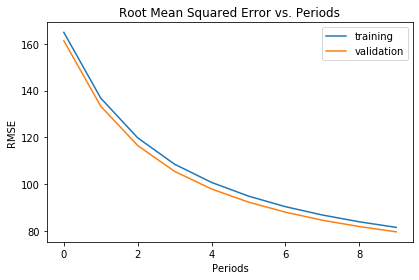

In [13]:
_ = train_model(
    learning_rate=1.0,
    steps=500,
    batch_size=100,
    feature_columns=construct_feature_columns(),
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

### Logistic Regression

In [2]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")

california_housing_dataframe = california_housing_dataframe.reindex(
    np.random.permutation(california_housing_dataframe.index))

 Instead of using median_house_value as target, we create a new binary target, median_house_value_is_high.

In [4]:
def preprocess_features(california_housing_dataframe):
    """Prepares input features from California housing data set.

    Args:
    california_housing_dataframe: A Pandas DataFrame expected to contain data
      from the California housing data set.
    Returns:
    A DataFrame that contains the features to be used for the model, including
    synthetic features.
    """
    selected_features = california_housing_dataframe[
    ["latitude",
     "longitude",
     "housing_median_age",
     "total_rooms",
     "total_bedrooms",
     "population",
     "households",
     "median_income"]]
    processed_features = selected_features.copy()
    # Create a synthetic feature.
    processed_features["rooms_per_person"] = (california_housing_dataframe["total_rooms"] /
                                              california_housing_dataframe["population"])
    return processed_features

def preprocess_targets(california_housing_dataframe):
    """Prepares target features (i.e., labels) from California housing data set.

    Args:
    california_housing_dataframe: A Pandas DataFrame expected to contain data
      from the California housing data set.
    Returns:
    A DataFrame that contains the target feature.
    """
    output_targets = pd.DataFrame()
    # Create a boolean categorical feature representing whether the
    # median_house_value is above a set threshold.
    output_targets["median_house_value_is_high"] = (
                                        california_housing_dataframe["median_house_value"] > 265000).astype(float)
    return output_targets

In [5]:
# Choose the first 12000 (out of 17000) examples for training.
training_examples = preprocess_features(california_housing_dataframe.head(12000))
training_targets = preprocess_targets(california_housing_dataframe.head(12000))

# Choose the last 5000 (out of 17000) examples for validation.
validation_examples = preprocess_features(california_housing_dataframe.tail(5000))
validation_targets = preprocess_targets(california_housing_dataframe.tail(5000))

# Double-check that we've done the right thing.
print("Training examples summary:")
display.display(training_examples.describe())
print("Validation examples summary:")
display.display(validation_examples.describe())

print("Training targets summary:")
display.display(training_targets.describe())
print("Validation targets summary:")
display.display(validation_targets.describe())

Training examples summary:


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0
mean,35.6,-119.6,28.5,2647.7,540.5,1430.0,501.6,3.9,2.0
std,2.1,2.0,12.6,2190.7,423.6,1161.7,385.0,1.9,1.3
min,32.5,-124.3,1.0,12.0,3.0,8.0,2.0,0.5,0.0
25%,33.9,-121.8,18.0,1469.0,297.0,793.0,282.0,2.6,1.5
50%,34.2,-118.5,29.0,2137.0,434.0,1167.0,410.0,3.5,1.9
75%,37.7,-118.0,37.0,3142.0,650.0,1717.2,605.0,4.8,2.3
max,42.0,-114.3,52.0,37937.0,6445.0,35682.0,6082.0,15.0,55.2


Validation examples summary:


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
mean,35.6,-119.5,28.7,2634.0,536.9,1428.4,500.2,3.9,2.0
std,2.1,2.0,12.6,2154.2,416.4,1114.1,383.5,1.9,0.9
min,32.5,-124.2,2.0,2.0,1.0,3.0,1.0,0.5,0.2
25%,33.9,-121.8,18.0,1443.0,295.0,782.8,281.0,2.6,1.5
50%,34.2,-118.5,29.0,2106.5,433.0,1165.5,406.0,3.5,1.9
75%,37.7,-118.0,37.0,3171.0,644.0,1739.0,606.0,4.7,2.3
max,42.0,-114.6,52.0,28258.0,4952.0,12427.0,4616.0,15.0,34.2


Training targets summary:


,median_house_value_is_high
count,12000.0
mean,0.2
std,0.4
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,1.0


Validation targets summary:


,median_house_value_is_high
count,5000.0
mean,0.3
std,0.4
min,0.0
25%,0.0
50%,0.0
75%,1.0
max,1.0


To see why logistic regression is effective, let us first train a naive model that uses linear regression. This model will use labels with values in the set {0, 1} and will try to predict a continuous value that is as close as possible to 0 or 1. Furthermore, we wish to interpret the output as a probability, so it would be ideal if the output will be within the range (0, 1). We would then apply a threshold of 0.5 to determine the label.

Run the cells below to train the linear regression model using LinearRegressor.

In [7]:
def construct_feature_columns(input_features):
    """Construct the TensorFlow Feature Columns.

    Args:
    input_features: The names of the numerical input features to use.
    Returns:
    A set of feature columns
    """
    return set([tf.feature_column.numeric_column(my_feature)
              for my_feature in input_features])

In [8]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model.

    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """

    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                            

    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)

    # Shuffle the data, if specified.
    if shuffle:
        ds = ds.shuffle(10000)

    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

In [10]:
def train_linear_regressor_model(
    learning_rate,
    steps,
    batch_size,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
    """Trains a linear regression model.

    In addition to training, this function also prints training progress information,
    as well as a plot of the training and validation loss over time.

    Args:
    learning_rate: A `float`, the learning rate.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    training_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for training.
    training_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for training.
    validation_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for validation.
    validation_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for validation.

    Returns:
    A `LinearRegressor` object trained on the training data.
    """

    periods = 10
    steps_per_period = steps / periods

    # Create a linear regressor object.
    my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
    linear_regressor = tf.estimator.LinearRegressor(
      feature_columns=construct_feature_columns(training_examples),
      optimizer=my_optimizer
    )

    # Create input functions.
    training_input_fn = lambda: my_input_fn(training_examples, 
                                          training_targets["median_house_value_is_high"], 
                                          batch_size=batch_size)
    predict_training_input_fn = lambda: my_input_fn(training_examples, 
                                                  training_targets["median_house_value_is_high"], 
                                                  num_epochs=1, 
                                                  shuffle=False)
    predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                    validation_targets["median_house_value_is_high"], 
                                                    num_epochs=1, 
                                                    shuffle=False)

    # Train the model, but do so inside a loop so that we can periodically assess
    # loss metrics.
    print("Training model...")
    print("RMSE (on training data):")
    training_rmse = []
    validation_rmse = []
    for period in range (0, periods):
    # Train the model, starting from the prior state.
        linear_regressor.train(
            input_fn=training_input_fn,
            steps=steps_per_period
        )

        # Take a break and compute predictions.
        training_predictions = linear_regressor.predict(input_fn=predict_training_input_fn)
        training_predictions = np.array([item['predictions'][0] for item in training_predictions])

        validation_predictions = linear_regressor.predict(input_fn=predict_validation_input_fn)
        validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])

        # Compute training and validation loss.
        training_root_mean_squared_error = math.sqrt(
            metrics.mean_squared_error(training_predictions, training_targets))
        validation_root_mean_squared_error = math.sqrt(
            metrics.mean_squared_error(validation_predictions, validation_targets))
        # Occasionally print the current loss.
        print("  period %02d : %0.2f" % (period, training_root_mean_squared_error))
        # Add the loss metrics from this period to our list.
        training_rmse.append(training_root_mean_squared_error)
        validation_rmse.append(validation_root_mean_squared_error)
    print("Model training finished.")

    # Output a graph of loss metrics over periods.
    plt.ylabel("RMSE")
    plt.xlabel("Periods")
    plt.title("Root Mean Squared Error vs. Periods")
    plt.tight_layout()
    plt.plot(training_rmse, label="training")
    plt.plot(validation_rmse, label="validation")
    plt.legend()

    return linear_regressor

Training model...
RMSE (on training data):
  period 00 : 0.45
  period 01 : 0.45
  period 02 : 0.44
  period 03 : 0.45
  period 04 : 0.44
  period 05 : 0.44
  period 06 : 0.44
  period 07 : 0.44
  period 08 : 0.44
  period 09 : 0.44
Model training finished.


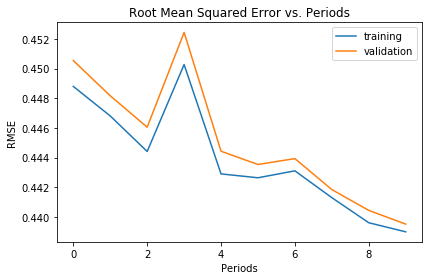

In [11]:
linear_regressor = train_linear_regressor_model(
    learning_rate=0.000001,
    steps=200,
    batch_size=20,
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

**Examine the predictions and decide whether or not we can use them to calculate LogLoss.**

`LinearRegressor` uses the L2 loss, which doesn't do a great job at penalizing misclassifications when the output is interpreted as a probability.  For example, there should be a huge difference whether a negative example is classified as positive with a probability of 0.9 vs 0.9999, but L2 loss doesn't strongly differentiate these cases.

In contrast, `LogLoss` penalizes these "confidence errors" much more heavily.  Remember, `LogLoss` is defined as:

$$Log Loss = \sum_{(x,y)\in D} -y \cdot log(y_{pred}) - (1 - y) \cdot log(1 - y_{pred})$$


But first, we'll need to obtain the prediction values. We could use `LinearRegressor.predict` to obtain these.

Given the predictions and the targets, calculate `LogLoss`

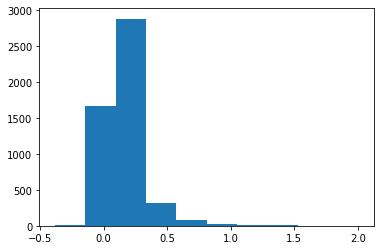

In [12]:
predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                  validation_targets["median_house_value_is_high"], 
                                                  num_epochs=1, 
                                                  shuffle=False)

validation_predictions = linear_regressor.predict(input_fn=predict_validation_input_fn)
validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])

_ = plt.hist(validation_predictions)

__Train a logistic regression model__

In [30]:
def train_linear_classifier_model(
    learning_rate,
    steps,
    batch_size,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
    """Trains a linear classification model.

    In addition to training, this function also prints training progress information,
    as well as a plot of the training and validation loss over time.

    Args:
    learning_rate: A `float`, the learning rate.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    training_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for training.
    training_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for training.
    validation_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for validation.
    validation_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for validation.

    Returns:
    A `LinearClassifier` object trained on the training data.
    """

    periods = 10
    steps_per_period = steps / periods

    # Create a linear classifier object.
    my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
    linear_classifier = tf.estimator.LinearClassifier(
        feature_columns=construct_feature_columns(training_examples),
        optimizer=my_optimizer)

    
    # Create input functions.
    training_input_fn = lambda: my_input_fn(training_examples, 
                                          training_targets["median_house_value_is_high"], 
                                          batch_size=batch_size)
    predict_training_input_fn = lambda: my_input_fn(training_examples, 
                                                  training_targets["median_house_value_is_high"], 
                                                  num_epochs=1, 
                                                  shuffle=False)
    predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                    validation_targets["median_house_value_is_high"], 
                                                    num_epochs=1, 
                                                    shuffle=False)

    # Train the model, but do so inside a loop so that we can periodically assess
    # loss metrics.
    print("Training model...")
    print("LogLoss (on training data):")
    training_log_losses = []
    validation_log_losses = []
    for period in range (0, periods):
        # Train the model, starting from the prior state.
        linear_classifier.train(
            input_fn=training_input_fn,
            steps=steps_per_period
        )
        # Take a break and compute predictions.    
        training_probabilities = linear_classifier.predict(input_fn=predict_training_input_fn)
        training_probabilities = np.array([item['probabilities'] for item in training_probabilities])

        validation_probabilities = linear_classifier.predict(input_fn=predict_validation_input_fn)
        validation_probabilities = np.array([item['probabilities'] for item in validation_probabilities])

        training_log_loss = metrics.log_loss(training_targets, training_probabilities)
        validation_log_loss = metrics.log_loss(validation_targets, validation_probabilities)
        # Occasionally print the current loss.
        print("  period %02d : %0.2f" % (period, training_log_loss))
        # Add the loss metrics from this period to our list.
        training_log_losses.append(training_log_loss)
        validation_log_losses.append(validation_log_loss)
    print("Model training finished.")

    # Output a graph of loss metrics over periods.
    plt.ylabel("LogLoss")
    plt.xlabel("Periods")
    plt.title("LogLoss vs. Periods")
    plt.tight_layout()
    plt.plot(training_log_losses, label="training")
    plt.plot(validation_log_losses, label="validation")
    plt.legend()

    return linear_classifier

Training model...
LogLoss (on training data):
  period 00 : 0.60
  period 01 : 0.58
  period 02 : 0.56
  period 03 : 0.56
  period 04 : 0.55
  period 05 : 0.54
  period 06 : 0.54
  period 07 : 0.53
  period 08 : 0.53
  period 09 : 0.53
Model training finished.


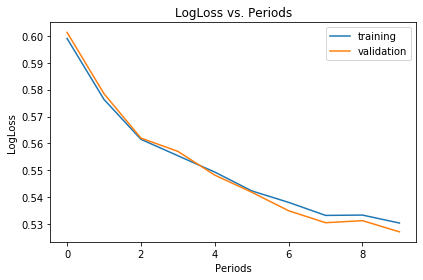

In [31]:
linear_classifier = train_linear_classifier_model(
    learning_rate=0.000005,
    steps=500,
    batch_size=20,
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

Calculate Accuracy and plot a ROC Curve for the Validation Set

In [32]:
predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                  validation_targets["median_house_value_is_high"], 
                                                  num_epochs=1, 
                                                  shuffle=False)

evaluation_metrics = linear_classifier.evaluate(input_fn=predict_validation_input_fn)

print("AUC on the validation set: %0.2f" % evaluation_metrics['auc'])
print("Accuracy on the validation set: %0.2f" % evaluation_metrics['accuracy'])

AUC on the validation set: 0.73
Accuracy on the validation set: 0.76


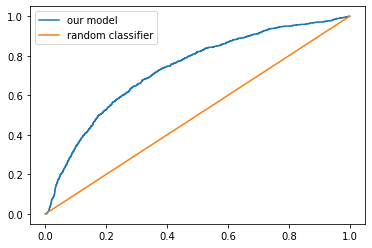

In [33]:
validation_probabilities = linear_classifier.predict(input_fn=predict_validation_input_fn)
# Get just the probabilities for the positive class.
validation_probabilities = np.array([item['probabilities'][1] for item in validation_probabilities])

false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(
    validation_targets, validation_probabilities)
plt.plot(false_positive_rate, true_positive_rate, label="our model")
plt.plot([0, 1], [0, 1], label="random classifier")
_ = plt.legend(loc=2)

Model tuning

Training model...
LogLoss (on training data):
  period 00 : 0.59
  period 01 : 0.55
  period 02 : 0.55
  period 03 : 0.53
  period 04 : 0.55
  period 05 : 0.54
  period 06 : 0.54
  period 07 : 0.55
  period 08 : 0.52
  period 09 : 0.53
Model training finished.
AUC on the validation set: 0.73
Accuracy on the validation set: 0.76


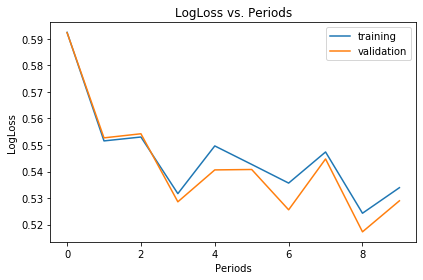

In [35]:
# TUNE THE SETTINGS BELOW TO IMPROVE AUC
linear_classifier = train_linear_classifier_model(
    learning_rate=0.00001,
    steps=500,
    batch_size=20,
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

evaluation_metrics = linear_classifier.evaluate(input_fn=predict_validation_input_fn)

print("AUC on the validation set: %0.2f" % evaluation_metrics['auc'])
print("Accuracy on the validation set: %0.2f" % evaluation_metrics['accuracy'])

One possible solution that works is to just train for longer, as long as we don't overfit.

We can do this by increasing the number the steps, the batch size, or both.

All metrics improve at the same time, so our loss metric is a good proxy for both AUC and accuracy.

Notice how it takes many, many more iterations just to squeeze a few more units of AUC. This commonly happens. But often even this small gain is worth the costs.

Training model...
LogLoss (on training data):
  period 00 : 0.50
  period 01 : 0.48
  period 02 : 0.48
  period 03 : 0.47
  period 04 : 0.47
  period 05 : 0.47
  period 06 : 0.47
  period 07 : 0.47
  period 08 : 0.47
  period 09 : 0.46
Model training finished.
AUC on the validation set: 0.81
Accuracy on the validation set: 0.78


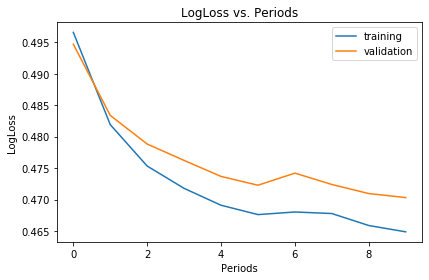

In [36]:
linear_classifier = train_linear_classifier_model(
    learning_rate=0.000003,
    steps=20000,
    batch_size=500,
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

evaluation_metrics = linear_classifier.evaluate(input_fn=predict_validation_input_fn)

print("AUC on the validation set: %0.2f" % evaluation_metrics['auc'])
print("Accuracy on the validation set: %0.2f" % evaluation_metrics['accuracy'])

### Sparsity and L1 Regularization

In [37]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")

california_housing_dataframe = california_housing_dataframe.reindex(
    np.random.permutation(california_housing_dataframe.index))

In [38]:
def preprocess_features(california_housing_dataframe):
    """Prepares input features from California housing data set.

    Args:
    california_housing_dataframe: A Pandas DataFrame expected to contain data
      from the California housing data set.
    Returns:
    A DataFrame that contains the features to be used for the model, including
    synthetic features.
    """
    selected_features = california_housing_dataframe[
    ["latitude",
     "longitude",
     "housing_median_age",
     "total_rooms",
     "total_bedrooms",
     "population",
     "households",
     "median_income"]]
    processed_features = selected_features.copy()
    # Create a synthetic feature.
    processed_features["rooms_per_person"] = (
    california_housing_dataframe["total_rooms"] /
    california_housing_dataframe["population"])
    return processed_features

def preprocess_targets(california_housing_dataframe):
    """Prepares target features (i.e., labels) from California housing data set.

    Args:
    california_housing_dataframe: A Pandas DataFrame expected to contain data
      from the California housing data set.
    Returns:
    A DataFrame that contains the target feature.
    """
    output_targets = pd.DataFrame()
    # Create a boolean categorical feature representing whether the
    # median_house_value is above a set threshold.
    output_targets["median_house_value_is_high"] = (
    california_housing_dataframe["median_house_value"] > 265000).astype(float)
    return output_targets

In [39]:
# Choose the first 12000 (out of 17000) examples for training.
training_examples = preprocess_features(california_housing_dataframe.head(12000))
training_targets = preprocess_targets(california_housing_dataframe.head(12000))

# Choose the last 5000 (out of 17000) examples for validation.
validation_examples = preprocess_features(california_housing_dataframe.tail(5000))
validation_targets = preprocess_targets(california_housing_dataframe.tail(5000))

# Double-check that we've done the right thing.
print("Training examples summary:")
display.display(training_examples.describe())
print("Validation examples summary:")
display.display(validation_examples.describe())

print("Training targets summary:")
display.display(training_targets.describe())
print("Validation targets summary:")
display.display(validation_targets.describe())

Training examples summary:


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0
mean,35.6,-119.6,28.5,2645.8,539.6,1430.4,501.9,3.9,2.0
std,2.1,2.0,12.6,2155.5,415.5,1093.0,379.1,1.9,1.0
min,32.5,-124.3,1.0,2.0,1.0,3.0,1.0,0.5,0.1
25%,33.9,-121.8,18.0,1461.8,297.0,791.0,281.0,2.6,1.5
50%,34.2,-118.5,29.0,2139.0,436.0,1174.0,411.0,3.6,1.9
75%,37.7,-118.0,37.0,3153.0,653.0,1726.2,608.0,4.8,2.3
max,42.0,-114.3,52.0,37937.0,5471.0,16122.0,5189.0,15.0,34.2


Validation examples summary:


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
mean,35.6,-119.6,28.7,2638.4,539.0,1427.6,499.6,3.9,2.0
std,2.2,2.0,12.6,2237.7,435.6,1270.1,397.3,1.9,1.6
min,32.6,-124.3,2.0,11.0,4.0,9.0,2.0,0.5,0.0
25%,33.9,-121.8,18.0,1464.8,295.0,786.0,282.0,2.6,1.5
50%,34.2,-118.5,29.0,2104.0,429.0,1152.0,402.0,3.5,2.0
75%,37.7,-118.0,37.0,3148.0,639.0,1711.2,595.0,4.8,2.3
max,41.9,-114.5,52.0,32627.0,6445.0,35682.0,6082.0,15.0,55.2


Training targets summary:


,median_house_value_is_high
count,12000.0
mean,0.3
std,0.4
min,0.0
25%,0.0
50%,0.0
75%,1.0
max,1.0


Validation targets summary:


,median_house_value_is_high
count,5000.0
mean,0.2
std,0.4
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,1.0


In [40]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model.
  
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
  
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                            
 
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified.
    if shuffle:
        ds = ds.shuffle(10000)
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

In [41]:
def get_quantile_based_buckets(feature_values, num_buckets):
    quantiles = feature_values.quantile(
    [(i+1.)/(num_buckets + 1.) for i in range(num_buckets)])
    return [quantiles[q] for q in quantiles.keys()]

In [42]:
def construct_feature_columns():
    """Construct the TensorFlow Feature Columns.

    Returns:
    A set of feature columns
    """

    bucketized_households = tf.feature_column.bucketized_column(
    tf.feature_column.numeric_column("households"),
    boundaries=get_quantile_based_buckets(training_examples["households"], 10))
    bucketized_longitude = tf.feature_column.bucketized_column(
    tf.feature_column.numeric_column("longitude"),
    boundaries=get_quantile_based_buckets(training_examples["longitude"], 50))
    bucketized_latitude = tf.feature_column.bucketized_column(
    tf.feature_column.numeric_column("latitude"),
    boundaries=get_quantile_based_buckets(training_examples["latitude"], 50))
    bucketized_housing_median_age = tf.feature_column.bucketized_column(
    tf.feature_column.numeric_column("housing_median_age"),
    boundaries=get_quantile_based_buckets(
      training_examples["housing_median_age"], 10))
    bucketized_total_rooms = tf.feature_column.bucketized_column(
    tf.feature_column.numeric_column("total_rooms"),
    boundaries=get_quantile_based_buckets(training_examples["total_rooms"], 10))
    bucketized_total_bedrooms = tf.feature_column.bucketized_column(
    tf.feature_column.numeric_column("total_bedrooms"),
    boundaries=get_quantile_based_buckets(training_examples["total_bedrooms"], 10))
    bucketized_population = tf.feature_column.bucketized_column(
    tf.feature_column.numeric_column("population"),
    boundaries=get_quantile_based_buckets(training_examples["population"], 10))
    bucketized_median_income = tf.feature_column.bucketized_column(
    tf.feature_column.numeric_column("median_income"),
    boundaries=get_quantile_based_buckets(training_examples["median_income"], 10))
    bucketized_rooms_per_person = tf.feature_column.bucketized_column(
    tf.feature_column.numeric_column("rooms_per_person"),
    boundaries=get_quantile_based_buckets(
      training_examples["rooms_per_person"], 10))

    long_x_lat = tf.feature_column.crossed_column(
    set([bucketized_longitude, bucketized_latitude]), hash_bucket_size=1000)

    feature_columns = set([
    long_x_lat,
    bucketized_longitude,
    bucketized_latitude,
    bucketized_housing_median_age,
    bucketized_total_rooms,
    bucketized_total_bedrooms,
    bucketized_population,
    bucketized_households,
    bucketized_median_income,
    bucketized_rooms_per_person])

    return feature_columns

__Calculate the Model Size__

To calculate the model size, we simply count the number of parameters that are non-zero.

In [43]:
def model_size(estimator):
    variables = estimator.get_variable_names()
    size = 0
    for variable in variables:
        if not any(x in variable 
                   for x in ['global_step',
                             'centered_bias_weight',
                             'bias_weight',
                             'Ftrl']
                  ):
            size += np.count_nonzero(estimator.get_variable_value(variable))
    return size

Find an L1 regularization strength parameter which satisfies both constraints — model size is less than 600 and log-loss is less than 0.35 on validation set.

The following code will help you get started. There are many ways to apply regularization to your model. Here, we chose to do it using FtrlOptimizer, which is designed to give better results with L1 regularization than standard gradient descent.

Again, the model will train on the entire data set, so expect it to run slower than normal.

In [44]:
def train_linear_classifier_model(
    learning_rate,
    regularization_strength,
    steps,
    batch_size,
    feature_columns,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
    """Trains a linear regression model.

    In addition to training, this function also prints training progress information,
    as well as a plot of the training and validation loss over time.

    Args:
    learning_rate: A `float`, the learning rate.
    regularization_strength: A `float` that indicates the strength of the L1
       regularization. A value of `0.0` means no regularization.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    feature_columns: A `set` specifying the input feature columns to use.
    training_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for training.
    training_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for training.
    validation_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for validation.
    validation_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for validation.

    Returns:
    A `LinearClassifier` object trained on the training data.
    """

    periods = 7
    steps_per_period = steps / periods

    # Create a linear classifier object.
    my_optimizer = tf.train.FtrlOptimizer(learning_rate=learning_rate, l1_regularization_strength=regularization_strength)
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
    linear_classifier = tf.estimator.LinearClassifier(
      feature_columns=feature_columns,
      optimizer=my_optimizer
    )

    # Create input functions.
    training_input_fn = lambda: my_input_fn(training_examples, 
                                          training_targets["median_house_value_is_high"], 
                                          batch_size=batch_size)
    predict_training_input_fn = lambda: my_input_fn(training_examples, 
                                                  training_targets["median_house_value_is_high"], 
                                                  num_epochs=1, 
                                                  shuffle=False)
    predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                    validation_targets["median_house_value_is_high"], 
                                                    num_epochs=1, 
                                                    shuffle=False)

    # Train the model, but do so inside a loop so that we can periodically assess
    # loss metrics.
    print("Training model...")
    print("LogLoss (on validation data):")
    training_log_losses = []
    validation_log_losses = []
    for period in range (0, periods):
        # Train the model, starting from the prior state.
        linear_classifier.train(
            input_fn=training_input_fn,
            steps=steps_per_period
        )
        # Take a break and compute predictions.
        training_probabilities = linear_classifier.predict(input_fn=predict_training_input_fn)
        training_probabilities = np.array([item['probabilities'] for item in training_probabilities])

        validation_probabilities = linear_classifier.predict(input_fn=predict_validation_input_fn)
        validation_probabilities = np.array([item['probabilities'] for item in validation_probabilities])

        # Compute training and validation loss.
        training_log_loss = metrics.log_loss(training_targets, training_probabilities)
        validation_log_loss = metrics.log_loss(validation_targets, validation_probabilities)
        # Occasionally print the current loss.
        print("  period %02d : %0.2f" % (period, validation_log_loss))
        # Add the loss metrics from this period to our list.
        training_log_losses.append(training_log_loss)
        validation_log_losses.append(validation_log_loss)
    print("Model training finished.")

    # Output a graph of loss metrics over periods.
    plt.ylabel("LogLoss")
    plt.xlabel("Periods")
    plt.title("LogLoss vs. Periods")
    plt.tight_layout()
    plt.plot(training_log_losses, label="training")
    plt.plot(validation_log_losses, label="validation")
    plt.legend()

    return linear_classifier

Training model...
LogLoss (on validation data):
  period 00 : 0.33
  period 01 : 0.29
  period 02 : 0.27
  period 03 : 0.26
  period 04 : 0.26
  period 05 : 0.25
  period 06 : 0.25
Model training finished.
Model size: 571


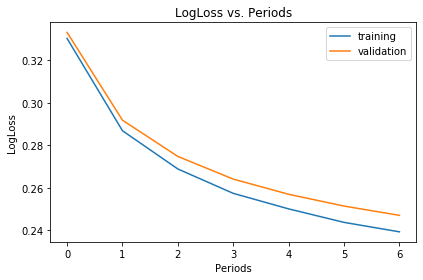

In [47]:
linear_classifier = train_linear_classifier_model(
    learning_rate=0.1,
    # TWEAK THE REGULARIZATION VALUE BELOW
    regularization_strength=0.8,
    steps=300,
    batch_size=100,
    feature_columns=construct_feature_columns(),
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)
print("Model size:", model_size(linear_classifier))

Because you're reducing model size while training on a toy dataset, you're forced to raise regularization strength to 0.8, which is anomalously high. When training on real-world datasets, regularization strength is much smaller than 0.8. Note that you're trading off model size versus loss. As you decrease model size by increasing regularization, your loss can increase.



### Introduction to Neural Networks

In [29]:
# Import relevant modules
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import seaborn as sns

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# Get train and test data
train_df = pd.read_csv('https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv')
train_df = train_df.reindex(np.random.permutation(train_df.index)) # shuffle the examples
test_df = pd.read_csv('https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv')

In [30]:
# Convert raw values to their Z-scores 

# Calculate the Z-scores of each column in the training set:
train_df_mean = train_df.mean()
train_df_std = train_df.std()
train_df_norm = (train_df - train_df_mean)/train_df_std

# Calculate the Z-scores of each column in the test set.
test_df_mean = test_df.mean()
test_df_std = test_df.std()
test_df_norm = (test_df - test_df_mean)/test_df_std

print("Normalized the values.")

Normalized the values.


__Represent data__

The following code cell creates a feature layer containing three features:

* `latitude` X `longitude` (a feature cross)
* `median_income`
* `population`

This code cell specifies the features that you'll ultimately train the model on and how each of those features will be represented. The transformations (collected in `my_feature_layer`) don't actually get applied until you pass a DataFrame to it, which will happen when we train the model. 

In [31]:
# Create an empty list that will eventually hold all created feature columns.
feature_columns = []

# We scaled all the columns, including latitude and longitude, into their
# Z scores. So, instead of picking a resolution in degrees, we're going
# to use resolution_in_Zs.  A resolution_in_Zs of 1 corresponds to 
# a full standard deviation. 
resolution_in_Zs = 0.3  # 3/10 of a standard deviation.

# Create a bucket feature column for latitude.
latitude_as_a_numeric_column = tf.feature_column.numeric_column("latitude")
latitude_boundaries = list(np.arange(int(min(train_df_norm['latitude'])), 
                                     int(max(train_df_norm['latitude'])), 
                                     resolution_in_Zs))
latitude = tf.feature_column.bucketized_column(latitude_as_a_numeric_column, latitude_boundaries)

# Create a bucket feature column for longitude.
longitude_as_a_numeric_column = tf.feature_column.numeric_column("longitude")
longitude_boundaries = list(np.arange(int(min(train_df_norm['longitude'])), 
                                      int(max(train_df_norm['longitude'])), 
                                      resolution_in_Zs))
longitude = tf.feature_column.bucketized_column(longitude_as_a_numeric_column, 
                                                longitude_boundaries)

# Create a feature cross of latitude and longitude.
latitude_x_longitude = tf.feature_column.crossed_column([latitude, longitude], hash_bucket_size=100)
crossed_feature = tf.feature_column.indicator_column(latitude_x_longitude)
feature_columns.append(crossed_feature)  

# Represent median_income as a floating-point value.
median_income = tf.feature_column.numeric_column("median_income")
feature_columns.append(median_income)

# Represent population as a floating-point value.
population = tf.feature_column.numeric_column("population")
feature_columns.append(population)

# Convert the list of feature columns into a layer that will later be fed into
# the model. 
my_feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

__Baseline Model__


Build a linear regression model as a baseline. Before creating a deep neural net, find a baseline loss by running a simple linear regression model that uses the feature layer you just created.

In [32]:
def plot_the_loss_curve(epochs, mse):
    """Plot a curve of loss vs. epoch."""

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Mean Squared Error")

    plt.plot(epochs, mse, label="Loss")
    plt.legend()
    plt.ylim([mse.min()*0.95, mse.max() * 1.03])
    plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


In [33]:
#@title Define functions to create and train a linear regression model
def create_model(my_learning_rate, feature_layer):
    """Create and compile a simple linear regression model."""
    # Most simple tf.keras models are sequential.
    model = tf.keras.models.Sequential()

    # Add the layer containing the feature columns to the model.
    model.add(feature_layer)

    # Add one linear layer to the model to yield a simple linear regressor.
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

    # Construct the layers into a model that TensorFlow can execute.
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()])

    return model           


def train_model(model, dataset, epochs, batch_size, label_name):
    """Feed a dataset into the model in order to train it."""

    # Split the dataset into features and label.
    features = {name:np.array(value) for name, value in dataset.items()}
    label = np.array(features.pop(label_name))
    history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True)

    # Get details that will be useful for plotting the loss curve.
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    rmse = hist["mean_squared_error"]

    return epochs, rmse   

print("Defined the create_model and train_model functions.")

Defined the create_model and train_model functions.


Train on 17000 samples
Epoch 1/15
17000/17000 [==============================] - 1s 30us/sample - loss: 0.9366 - mean_squared_error: 0.9366
Epoch 2/15
17000/17000 [==============================] - 0s 2us/sample - loss: 0.6359 - mean_squared_error: 0.6359
Epoch 3/15
17000/17000 [==============================] - 0s 2us/sample - loss: 0.4892 - mean_squared_error: 0.4892
Epoch 4/15
17000/17000 [==============================] - 0s 2us/sample - loss: 0.4100 - mean_squared_error: 0.4100
Epoch 5/15
17000/17000 [==============================] - 0s 2us/sample - loss: 0.3753 - mean_squared_error: 0.3753
Epoch 6/15
17000/17000 [==============================] - 0s 2us/sample - loss: 0.3642 - mean_squared_error: 0.3642
Epoch 7/15
17000/17000 [==============================] - 0s 2us/sample - loss: 0.3614 - mean_squared_error: 0.3614
Epoch 8/15
17000/17000 [==============================] - 0s 2us/sample - loss: 0.3604 - mean_squared_error: 0.3604
Epoch 9/15
17000/17000 [========================

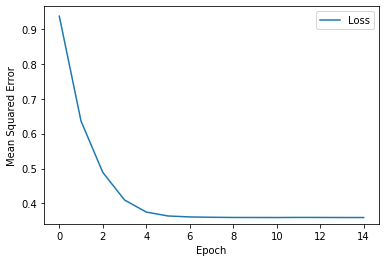


 Evaluate the linear regression model against the test set:
3000/1 - 0s - loss: 0.4188 - mean_squared_error: 0.3950
[0.39501338203748065, 0.3950134]


In [34]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 15
batch_size = 1000
label_name = "median_house_value"

# Establish the model's topography.
my_model = create_model(learning_rate, my_feature_layer)

# Train the model on the normalized training set.
epochs, mse = train_model(my_model, train_df_norm, epochs, batch_size, label_name)
plot_the_loss_curve(epochs, mse)

test_features = {name:np.array(value) for name, value in test_df_norm.items()}
test_label = np.array(test_features.pop(label_name)) # isolate the label
print("\n Evaluate the linear regression model against the test set:")
print(my_model.evaluate(x = test_features, y = test_label, batch_size=batch_size, verbose=2))

__Define a deep neural net model__

The `create_model` function defines the topography of the deep neural net, specifying the following:

* The number of [layers](https://developers.google.com/machine-learning/glossary/#layer) in the deep neural net.
* The number of [nodes](https://developers.google.com/machine-learning/glossary/#node) in each layer.

The `create_model` function also defines the [activation function](https://developers.google.com/machine-learning/glossary/#activation_function) of each layer.

In [56]:
def create_model(my_learning_rate, my_feature_layer):
    """Create and compile a simple linear regression model."""
    # Most simple tf.keras models are sequential.
    model = tf.keras.models.Sequential()

    # Add the layer containing the feature columns to the model.
    model.add(my_feature_layer)

    # Describe the topography of the model by calling the tf.keras.layers.Dense
    # method once for each layer. We've specified the following arguments:
    #   * units specifies the number of nodes in this layer.
    #   * activation specifies the activation function (Rectified Linear Unit).
    #   * name is just a string that can be useful when debugging.

    # Define the first hidden layer with 20 nodes.   
    model.add(tf.keras.layers.Dense(units=32, 
                                  activation='relu', 
#                                   kernel_regularizer=tf.keras.regularizers.l2(l=0.04), # regularization
                                  name='Hidden1'))

    # Define dropout regularization layer
    model.add(tf.keras.layers.Dropout(rate=0.20))
    
    
    # Define the second hidden layer with 12 nodes. 
    model.add(tf.keras.layers.Dense(units=16, 
                                  activation='relu', 
#                                   kernel_regularizer=tf.keras.regularizers.l2(0.04), # regularization
                                  name='Hidden2'))

    # Define the output layer.
    model.add(tf.keras.layers.Dense(units=1,  
                                  name='Output'))                              

    model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()])

    return model

__Define a training function__

The `train_model` function trains the model from the input features and labels. The [tf.keras.Model.fit](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#fit) method performs the actual training. The `x` parameter of the `fit` method is very flexible, enabling you to pass feature data in a variety of ways. The following implementation passes a Python dictionary in which:

* The *keys* are the names of each feature (for example, `longitude`, `latitude`, and so on).
* The *value* of each key is a NumPy array containing the values of that feature. 

**Note:** Although you are passing *every* feature to `model.fit`, most of those values will be ignored. Only the features accessed by `my_feature_layer` will actually be used to train the model.

In [57]:
def train_model(model, dataset, epochs, label_name,
                batch_size=None):
    """Train the model by feeding it data."""

    # Split the dataset into features and label.
    features = {name:np.array(value) for name, value in dataset.items()}
    label = np.array(features.pop(label_name))
    history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True) 

    # The list of epochs is stored separately from the rest of history.
    epochs = history.epoch

    # To track the progression of training, gather a snapshot
    # of the model's mean squared error at each epoch. 
    hist = pd.DataFrame(history.history)
    mse = hist["mean_squared_error"]

    return epochs, mse

__Training the Neural Network__

Train on 17000 samples
Epoch 1/20
17000/17000 [==============================] - 0s 27us/sample - loss: 0.6153 - mean_squared_error: 0.6153
Epoch 2/20
17000/17000 [==============================] - 0s 3us/sample - loss: 0.3888 - mean_squared_error: 0.3888
Epoch 3/20
17000/17000 [==============================] - 0s 3us/sample - loss: 0.3643 - mean_squared_error: 0.3643
Epoch 4/20
17000/17000 [==============================] - 0s 3us/sample - loss: 0.3596 - mean_squared_error: 0.3596
Epoch 5/20
17000/17000 [==============================] - 0s 3us/sample - loss: 0.3544 - mean_squared_error: 0.3544
Epoch 6/20
17000/17000 [==============================] - 0s 3us/sample - loss: 0.3525 - mean_squared_error: 0.3525
Epoch 7/20
17000/17000 [==============================] - 0s 3us/sample - loss: 0.3499 - mean_squared_error: 0.3499
Epoch 8/20
17000/17000 [==============================] - 0s 3us/sample - loss: 0.3491 - mean_squared_error: 0.3491
Epoch 9/20
17000/17000 [========================

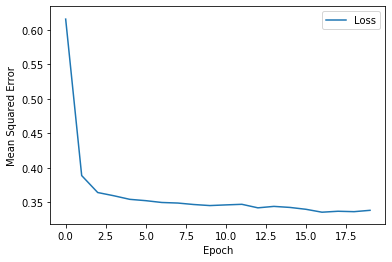


 Evaluate the new model against the test set:
3000/1 - 0s - loss: 0.3899 - mean_squared_error: 0.3669


[0.3669337332248688, 0.36693376]

In [58]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 20
batch_size = 1000

# Specify the label
label_name = "median_house_value"

# Establish the model's topography.
my_model = create_model(learning_rate, my_feature_layer)

# Train the model on the normalized training set. We're passing the entire
# normalized training set, but the model will only use the features
# defined by the feature_layer.
epochs, mse = train_model(my_model, train_df_norm, epochs, 
                          label_name, batch_size)
plot_the_loss_curve(epochs, mse)

# After building a model against the training set, test that model
# against the test set.
test_features = {name:np.array(value) for name, value in test_df_norm.items()}
test_label = np.array(test_features.pop(label_name)) # isolate the label
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x = test_features, y = test_label, batch_size=batch_size, verbose=2)

### Multi-class classification with MNIST.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# The following line improves formatting when ouputting NumPy arrays.
np.set_printoptions(linewidth = 200)

In [3]:
# Load the data
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [5]:
# View the data
# Output example #2917 of the training set.
x_train[2917]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 127, 100, 156, 239, 224, 177, 213, 159,  70,  13,   0,   0

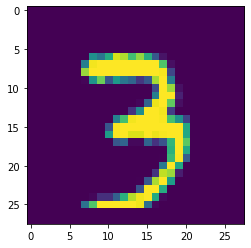

In [6]:
# Use false colors to visualize the array.
plt.imshow(x_train[2917])

In [7]:
# Output pixel #16 of row #10 of example #2900.
x_train[2917][10][16]

58

In [8]:
x_train_normalized = x_train / 255
x_test_normalized = x_test / 255
print(x_train_normalized[2900][10]) # Output a normalized row

[0.         0.         0.         0.         0.         0.         0.         0.55294118 1.         0.66666667 0.11372549 0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]


In [11]:
# Define the plotting function
def plot_curve(epochs, hist, list_of_metrics):
    """Plot a curve of one or more classification metrics vs. epoch."""  
    # list_of_metrics should be one of the names shown in:
    # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Value")

    for m in list_of_metrics:
        x = hist[m]
        plt.plot(epochs[1:], x[1:], label=m)

    plt.legend()

print("Loaded the plot_curve function.")

Loaded the plot_curve function.


In [12]:
def create_model(my_learning_rate):
    """Create and compile a deep neural net."""

    # All models in this course are sequential.
    model = tf.keras.models.Sequential()

    # The features are stored in a two-dimensional 28X28 array. 
    # Flatten that two-dimensional array into a a one-dimensional 
    # 784-element array.
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

    # Define the first hidden layer.   
    model.add(tf.keras.layers.Dense(units=32, activation='relu'))

    # Define a dropout regularization layer. 
    model.add(tf.keras.layers.Dropout(rate=0.2))

    # Define the output layer. The units parameter is set to 10 because
    # the model must choose among 10 possible output values (representing
    # the digits from 0 to 9, inclusive).
    #
    # Don't change this layer.
    model.add(tf.keras.layers.Dense(units=10, activation='softmax'))     

    # Construct the layers into a model that TensorFlow can execute.  
    # Notice that the loss function for multi-class classification
    # is different than the loss function for binary classification.  
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])

    return model    


def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
    """Train the model by feeding it data."""

    history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)

    # To track the progression of training, gather a snapshot
    # of the model's metrics at each epoch. 
    epochs = history.epoch
    hist = pd.DataFrame(history.history)

    return epochs, hist    

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 1s 12us/sample - loss: 1.7726 - accuracy: 0.4428 - val_loss: 1.0323 - val_accuracy: 0.7895
Epoch 2/50
48000/48000 [==============================] - 0s 5us/sample - loss: 0.9266 - accuracy: 0.7316 - val_loss: 0.5420 - val_accuracy: 0.8645
Epoch 3/50
48000/48000 [==============================] - 0s 5us/sample - loss: 0.6487 - accuracy: 0.8039 - val_loss: 0.4183 - val_accuracy: 0.8929
Epoch 4/50
48000/48000 [==============================] - 0s 6us/sample - loss: 0.5311 - accuracy: 0.8421 - val_loss: 0.3572 - val_accuracy: 0.9057
Epoch 5/50
48000/48000 [==============================] - 0s 5us/sample - loss: 0.4673 - accuracy: 0.8610 - val_loss: 0.3204 - val_accuracy: 0.9128
Epoch 6/50
48000/48000 [==============================] - 0s 5us/sample - loss: 0.4277 - accuracy: 0.8729 - val_loss: 0.2974 - val_accuracy: 0.9172
Epoch 7/50
48000/48000 [==============================] - 0s 

[0.14405548423528672, 0.959]

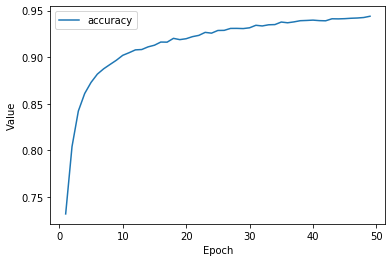

In [13]:
# The following variables are the hyperparameters.
learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

# Establish the model's topography.
my_model = create_model(learning_rate)

# Train the model on the normalized training set.
epochs, hist = train_model(my_model, x_train_normalized, y_train, 
                           epochs, batch_size, validation_split)

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)

__Optimize the model to get 98% accuracy__

In [19]:
def create_model(my_learning_rate):
    """Create and compile a deep neural net."""

    # All models in this course are sequential.
    model = tf.keras.models.Sequential()

    # The features are stored in a two-dimensional 28X28 array. 
    # Flatten that two-dimensional array into a a one-dimensional 
    # 784-element array.
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

    # Define the first hidden layer.   
    model.add(tf.keras.layers.Dense(units=256, activation='relu'))

    # Define a dropout regularization layer. 
    model.add(tf.keras.layers.Dropout(rate=0.45))

    # Define the output layer. The units parameter is set to 10 because
    # the model must choose among 10 possible output values (representing
    # the digits from 0 to 9, inclusive).
    #
    # Don't change this layer.
    model.add(tf.keras.layers.Dense(units=10, activation='softmax'))     

    # Construct the layers into a model that TensorFlow can execute.  
    # Notice that the loss function for multi-class classification
    # is different than the loss function for binary classification.  
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])

    return model  

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 1s 14us/sample - loss: 1.0254 - accuracy: 0.6869 - val_loss: 0.3709 - val_accuracy: 0.8922
Epoch 2/50
48000/48000 [==============================] - 0s 8us/sample - loss: 0.4162 - accuracy: 0.8748 - val_loss: 0.2746 - val_accuracy: 0.9220
Epoch 3/50
48000/48000 [==============================] - 0s 9us/sample - loss: 0.3135 - accuracy: 0.9092 - val_loss: 0.2286 - val_accuracy: 0.9358
Epoch 4/50
48000/48000 [==============================] - 0s 8us/sample - loss: 0.2614 - accuracy: 0.9250 - val_loss: 0.1959 - val_accuracy: 0.9438
Epoch 5/50
48000/48000 [==============================] - 0s 8us/sample - loss: 0.2276 - accuracy: 0.9338 - val_loss: 0.1767 - val_accuracy: 0.9494
Epoch 6/50
48000/48000 [==============================] - 0s 9us/sample - loss: 0.2043 - accuracy: 0.9409 - val_loss: 0.1593 - val_accuracy: 0.9553
Epoch 7/50
48000/48000 [==============================] - 0s 

[0.0667625330388546, 0.98]

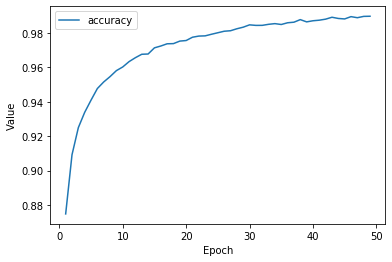

In [20]:
# The following variables are the hyperparameters.
learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

# Establish the model's topography.
my_model = create_model(learning_rate)

# Train the model on the normalized training set.
epochs, hist = train_model(my_model, x_train_normalized, y_train, 
                           epochs, batch_size, validation_split)

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)